# 텍스트 수집 및 키워드 분석

## 한글 폰트 설정

* 실행 후 런타임 재시작 필요

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

%config InlineBackend.figure_format='retina'

!apt -qq -y install fonts-nanum

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


## 한국어 형태소 분석기 설치

* 한국어 자연어 처리 konlpy 라이브러리
* 형태소 분석기 MeCab 설치
* 설치 명령어: 
`!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash`

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-10-19 05:06:09--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-10-19 05:06:09--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc38c02b6360b37ec59c7b16fc63.dl.dropboxusercontent.com/cd/0/get/BvFscmE2EamLJ_uey5R6IxqSNH7ktA_pnpuRiMk6uICGSPmsayBP0kfHFgQ90zYGB3StMVVL5WQhvddg_l3XRdN3J6PyK_5_HWFF764irobPiV6g_1kUh29Qc1BrrFRwW2ZUxfd12ElfYuCy5yeQwHxiQLVYkn76GP2ZYdrhEsDHa9QEtFQOOiE2EQi_vjkrwC4/file?dl=1# [following]
--2022-10-19 05:06:10--  https://uc38c02b6360b37ec59c7b16fc63.dl.dropboxusercontent.com/cd/0/get/BvFscmE2EamL

## 키워드 분석(Keyword Analysis)

* 핵심어(keyword)란 텍스트 자료의 중요한 내용을 압축적으로 제시하는 단어 또는 문구
* 핵심어 분석이란 불용어 제거와 어간추출 및 형태소 분석 등의 자연어 처리를 시행한 후 텍스트에서 많이 등장하는 형태소의 등장 빈도를 분석함으로써 핵심어를 추출   
* 특정 텍스트 자료에 많이 나타나는 형태소가 그 텍스트 주제를 표출할 가능성이 높다는 가정에 기초  
* 물론 빈도 분석에서 영어의 전치사나 한국어의 조사와 같이 의미를 별로 담고 있지 않은 불용어는 제외하는 것이 좋음
* 키워드 분석은 텍스트의 주제 추정, 텍스트 유사도, 검색 엔진의 검색 결과 우선 순위 측정 등 다양하게 사용될 수 있음

### 네이버 영화 리뷰 데이터

* 키워드 분석에는 네이버 영화 리뷰 데이터를 사용
* 데이터 다운로드: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [ ]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines() # text file 열고, 한줄 씩 가져올 수 있게 됨
print(raw[:5]) # byte 형태고 저장되어 있음



[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

* 데이터를 확인해보면 모두 바이트로 이루어져 있으며, 리뷰 외의 다른 데이터도 존재
* 데이터를 문자열로 변환하고 리뷰만 추출

In [ ]:
# id, document, lable 3개의 column으로 이루어짐
raw = [x.decode() for x in raw[1:]] # 0번째는 b'id\tdocument\tlabel\n',

reviews =[]
pos_neg = []
for i in raw:
    reviews.append(i.split('\t')[1])  # 0, 1, 2 중 document가 review이고 1임
    pos_neg.append(i.split('\t')[2])  # 2 가 긍정/부정
print(reviews[:5])
print(pos_neg[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']
['1\n', '1\n', '1\n', '1\n', '1\n']


### 형태소 분석을 이용한 명사 추출


* 형태소 분석기 Mecab으로 명사만 추출

In [ ]:
from konlpy.tag import Mecab
tagger = Mecab()

reviews_nouns = []

for review in reviews:
    for noun in tagger.nouns(review):
        reviews_nouns.append(noun)

reviews_nouns[:10]

['때', '디자인', '학생', '외국', '디자이너', '그', '전통', '발전', '문화', '산업']

#### 불용어(Stopwords) 사전 만들기

+ 개체명 인식 추가해서, '우리 나라'를 인식하도록 추가하기 **
* 형태소 분석을 통해 조사, 접속사 등의 제거 가능
* 하지만 한국어는 명사에서도 상당히 많은 불필요한 단어들이 포함
* 사용자가 직접 불용어 사전을 유지하면서 불필요한 단어 제거 필요 **
* 불용어 예: `전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 후 이 애 씨 속 뿐 밋 그 급 ㄷ 데`
* 빈도가 너무 커서 분석에 방해되는 단어도 제거 필요 (예: `영화`) **


In [ ]:
stop_words = '전 난 일 걸 뭐 줄 만 건 분 개 끝 잼 이거 번 중 듯 때 게 내 말 나 수 거 점 것 후 이 애 씨 속 뿐 밋 그 급 ㄷ 데 저 노 영화'
stop_words = stop_words.split()
print(stop_words)


['전', '난', '일', '걸', '뭐', '줄', '만', '건', '분', '개', '끝', '잼', '이거', '번', '중', '듯', '때', '게', '내', '말', '나', '수', '거', '점', '것', '후', '이', '애', '씨', '속', '뿐', '밋', '그', '급', 'ㄷ', '데', '저', '노', '영화']


#### 불용어를 제외하여 형태소 분석 수행

* 한글 텍스트에 대해서 형태소 분석 수행
* 분석으로 추출하는 명사 중에서 불용어에 포함되지 않은 텍스트만 추출하여 저장

In [ ]:
reviews_nouns = []
for review in reviews:
    for noun in tagger.nouns(review):
        if noun not in stop_words:
            reviews_nouns.append(noun)

reviews_nouns[:10]

['디자인', '학생', '외국', '디자이너', '전통', '발전', '문화', '산업', '우리', '나라']

### 단어 빈도수 측정

* 단어 빈도수 측정에는 `collections` 라이브러리의 `Counter` 함수를 이용
* `collections` 라이브러리는 내장 라이브러리로 별도 설치가 필요없음
* `counter`를 이용하면 각 단어와 각 단어의 빈도 수를 딕셔너리로 편리하게 생성 가능

In [ ]:
from collections import Counter

reviews_nouns_counter = Counter(reviews_nouns)
top_reviews_nouns = dict(reviews_nouns_counter.most_common(100))
top_reviews_nouns

{'연기': 9175,
 '최고': 8813,
 '평점': 8514,
 '스토리': 7163,
 '생각': 6943,
 '드라마': 6896,
 '사람': 6742,
 '감동': 6489,
 '배우': 5893,
 '내용': 5731,
 '감독': 5629,
 '재미': 5479,
 '시간': 5320,
 '년': 4936,
 '사랑': 4741,
 '쓰레기': 4585,
 '작품': 3985,
 '하나': 3923,
 '정도': 3656,
 '이건': 3650,
 '마지막': 3647,
 '액션': 3568,
 '기대': 3465,
 '장면': 3262,
 '이게': 3046,
 '편': 3044,
 '최악': 3019,
 '돈': 2980,
 '이야기': 2947,
 '이해': 2745,
 '명작': 2685,
 '여자': 2678,
 '이상': 2676,
 '처음': 2673,
 '한국': 2640,
 '주인공': 2553,
 '우리': 2531,
 '연출': 2376,
 '때문': 2371,
 '기억': 2364,
 '현실': 2193,
 '마음': 2128,
 '굿': 2110,
 '남자': 2078,
 '결말': 2066,
 '인생': 2060,
 '공포': 2048,
 '전개': 2035,
 '짜증': 2011,
 '소재': 1999,
 '느낌': 1950,
 '필요': 1929,
 '일본': 1878,
 '반전': 1868,
 '수준': 1864,
 '음악': 1852,
 '매력': 1832,
 '가슴': 1817,
 '인간': 1811,
 '짱': 1809,
 '아이': 1749,
 '원작': 1705,
 '눈물': 1704,
 '코미디': 1598,
 '추천': 1579,
 '자체': 1558,
 '실망': 1557,
 '대박': 1495,
 '눈': 1484,
 '몰입': 1453,
 '캐릭터': 1440,
 '나라': 1409,
 '가족': 1401,
 '건지': 1397,
 '연기력': 1387,
 '여운': 1386,
 '시리즈': 1

### 단어 빈도 시각화

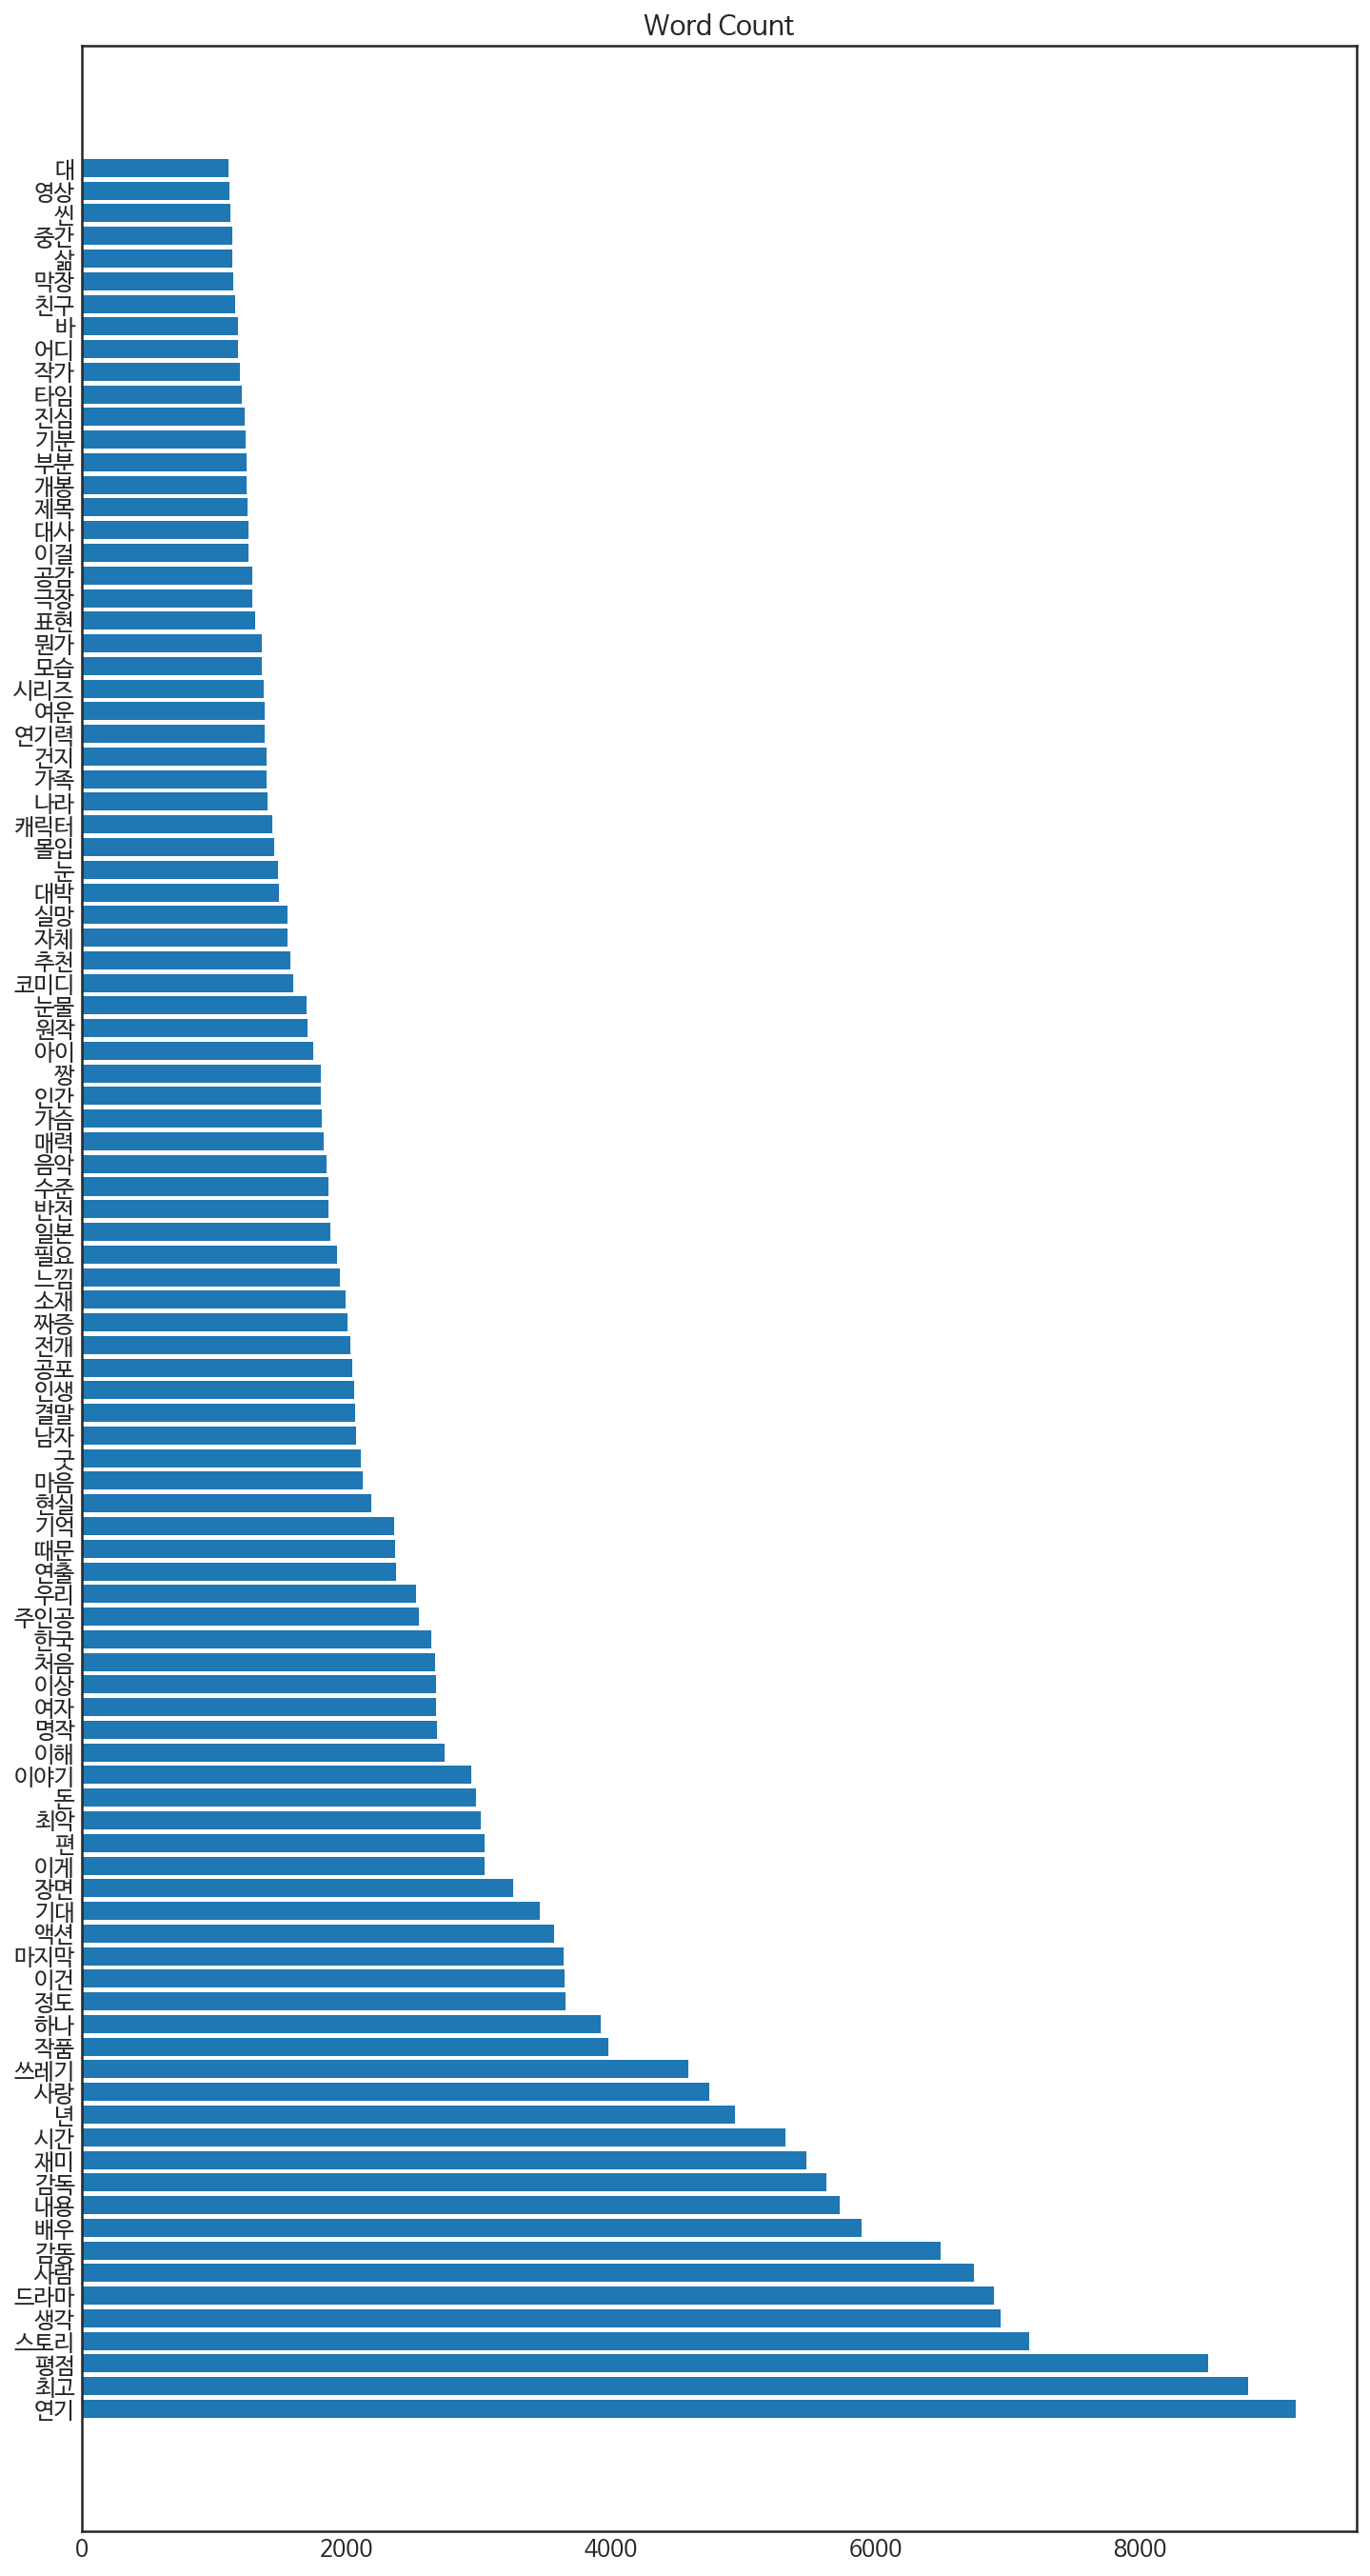

In [ ]:
import numpy as np

plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_reviews_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos, top_reviews_nouns.values())
plt.title("Word Count")
plt.yticks(y_pos, top_reviews_nouns.keys())
plt.show()

### 트리맵(Treemap) 시각화

* `squarify`는 트리맵 생성을 지원해주는 파이썬 라이브러리
* `squarify` 라이브러리를 이용해 키워드와 키워드 빈도 수를 트리맵으로 나타냄   

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


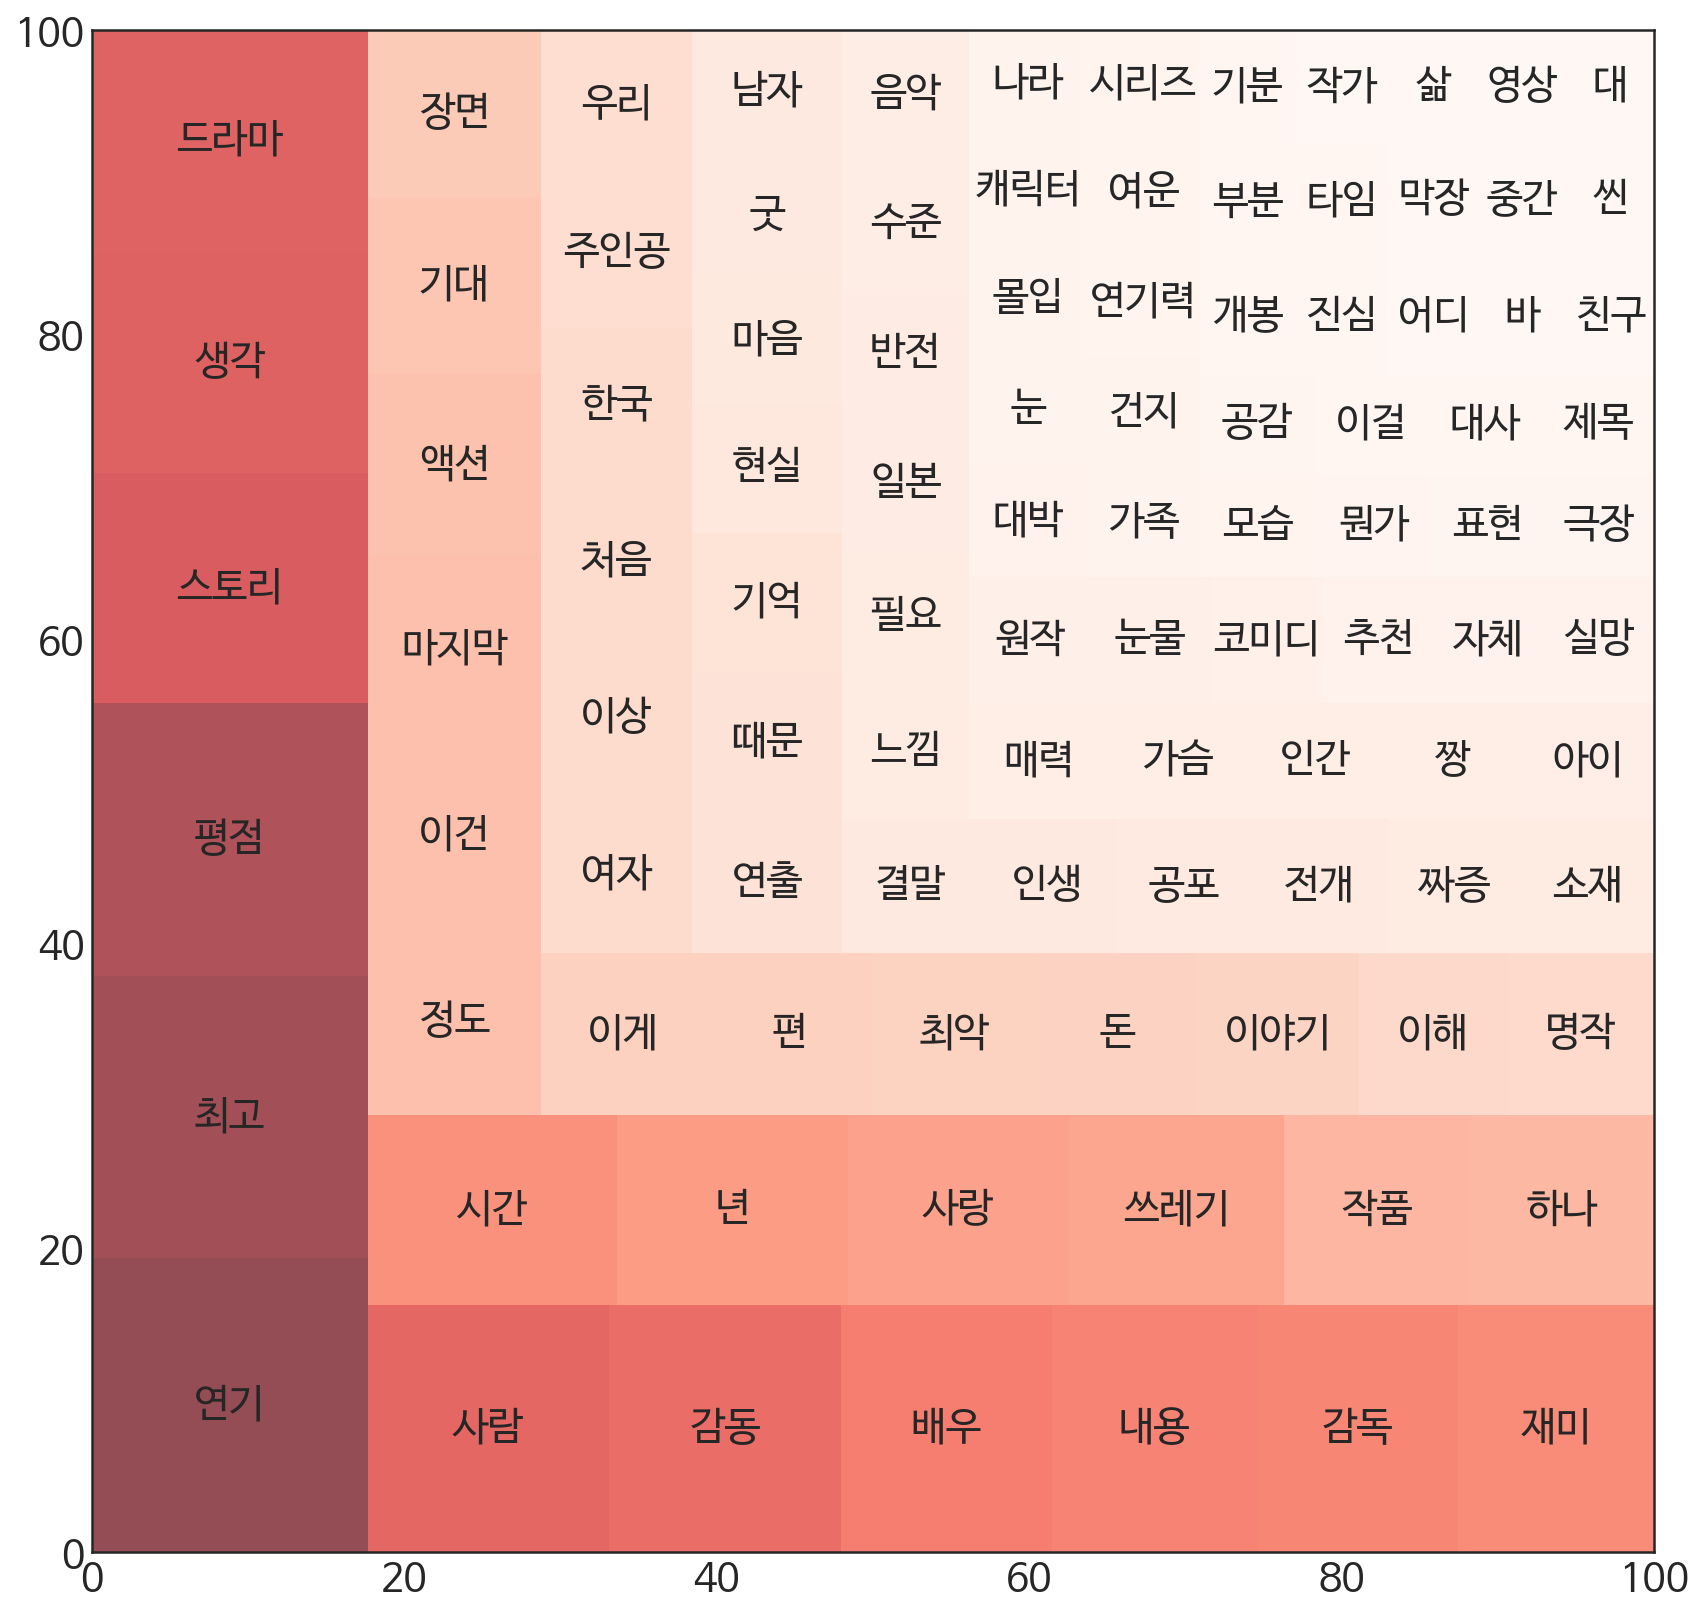

In [ ]:
import squarify

plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_reviews_nouns.values()), vmax=max(top_reviews_nouns.values()))

colors = [mpl.cm.Reds(norm(value)) for value in top_reviews_nouns.values()]

squarify.plot(label=top_reviews_nouns.keys(),
              sizes=top_reviews_nouns.values(),
              color=colors,
              alpha=0.7)

### 워드클라우드(WordCloud) 시각화

* 텍스트에 담겨있는 여러 형태소들의 등장 빈도를 가장 직관적으로 시각화하는 방법
* 텍스트에 등장하는 단어를 그 등장 빈도에 따라 서로 크기가 다르게 구름 형태로 표현함으로써, 단어의 빈도 수를 한번에 알 수 있음  
* 최근에 많은 서비스들이 어떤 핵심어가 많이 등장했는가를 워드클라우드 형식으로 시각화
* 빈도 수만을 시각적으로 표현한 것이기 때문에, 단어들 사이의 연관성이나 의미 구조 등을 분석하는 데는 한계가 있음

* 파이썬에서 워드 클라우드를 시각화하기 위해 `matplotlib` 라이브러리와 `WordCloud` 라이브러리를 `import` 해서 사용
* `WordCloud` 라이브러리는 `pip install wordcloud` 명령어를 통해 설치 필요

In [ ]:
! pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


* WordCloud를 이용해 객체를 생성해주고,
`generate_from_frequencies()` 함수로 빈도 수에 따라 워드클라우드 생성

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_reviews_nouns)

* 워드클라우드를 시각화할 때는 이미지 시각화 함수인 `imshow()` 함수를 사용해야 함

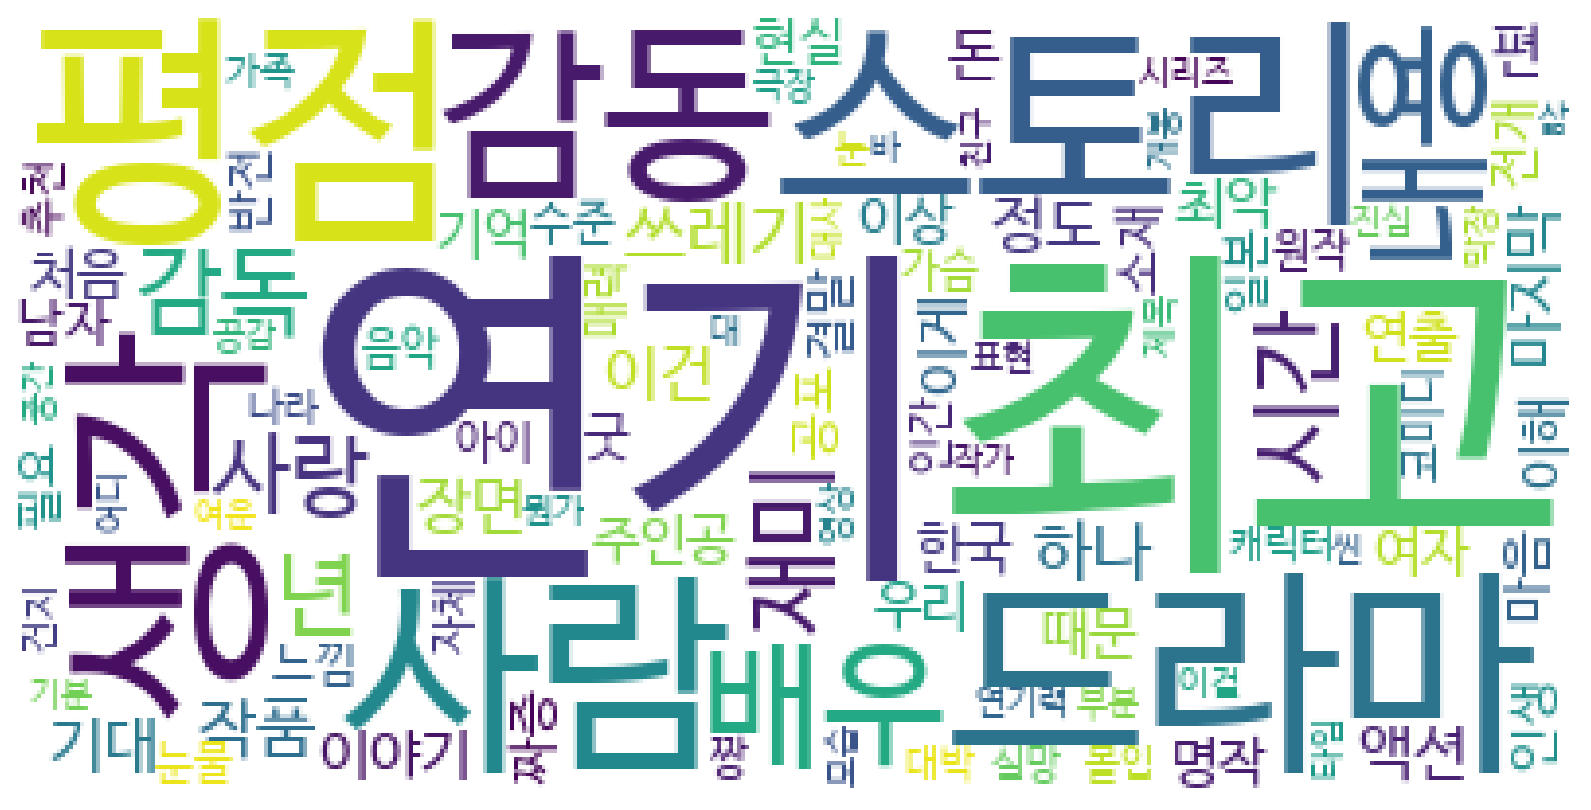

In [ ]:
figure = plt.figure(figsize=(14,14))
ax = figure.add_subplot(1,1,1)
ax.axis('off')  # xy축 없애기
ax.imshow(wc)
plt.show()

## 네이버 검색 API 서비스

### 네이버 서비스 API 신청

1. 네이버 개발자센터: https://developers.naver.com/
2. 어플리케이션 등록
3. 클라이언트 ID/SECRET 확인

### NAVER 서비스 API 종류

| 항목 | 주소                                         |
|------|----------------------------------------------|
|블로그| https://openapi.naver.com/v1/search/blog.json |
|뉴스　| https://openapi.naver.com/v1/search/news.json |
| 책　 | https://openapi.naver.com/v1/search/book.json|
| 성인 검색어 판별|　https://openapi.naver.com/v1/search/adult.json|
| 백과사전| https://openapi.naver.com/v1/search/encyc.json|
| 영화| https://openapi.naver.com/v1/search/movie.json|
| 카페글 |https://openapi.naver.com/v1/search/cafearticle.json|
| 지식in| https://openapi.naver.com/v1/search/kin.json|
| 지역 | https://openapi.naver.com/v1/search/local.json|
| 오타변환 | https://openapi.naver.com/v1/search/errata.json|
| 웹문서 | https://openapi.naver.com/v1/search/webkr.json|
| 이미지 | https://openapi.naver.com/v1/search/image.json|
| 쇼핑 | https://openapi.naver.com/v1/search/shop.json|
| 전문자료 | https://openapi.naver.com/v1/search/doc.json|

## 네이버 웹문서 키워드 분석

### 네이버 웹문서 검색 API

In [ ]:
import os, sys, urllib.request, json, re
import pandas as pd

query = urllib.parse.quote(input('검색 질의: '))
idx = 0  # web_df 의 length
display=100
start = 1
end = 1000

web_df = pd.DataFrame(columns=['Title','Link','Description'])

for start_index in range(start, end, display):
    url = 'https://openapi.naver.com/v1/search/webkr?query=' + query \
        + '&display=' + str(display) + '&start=' + str(start_index)
    
    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)   # header에 id 넣기
    request.add_header('X-Naver-Client-Secret', client_secret) 
    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if (rescode==200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']

        # 불필요한 정보 삭제
        for item_index in range(0, len(items)):
            remove_tag = re.compile('<.*?>')  # 불필요한 태그  정규 표현식
            title = re.sub(remove_tag, '', items[item_index]['title']) # items[item_index]['title']값의 불필요한 태그를 ''으로 대체
            link = items[item_index]['link']
            description = re.sub(remove_tag,'',items[item_index]['description'])

            web_df.loc[idx] = [title, link, description]  # df에 넣기
            idx += 1

    else:
        print("Error Code : " + rescode)


web_df

검색 질의: 전쟁


,Title,Link,Description
0,전쟁 - 나무위키,https://namu.wiki/w/%EC%A0%84%EC%9F%81,"전쟁(戰爭, War)은 국가(또는 사회 집단) 들이 무력을 사용하여 상대방에게 자신..."
1,전쟁(戰爭) - 한국민족문화대백과사전,http://encykorea.aks.ac.kr/Contents/Item/E0049619,전쟁은 자국의 의사를 상대국에 강요하기 위하여 국가 간 또는 이에 준하는 집단 간에...
2,이라크 전쟁 - 나무위키,https://namu.wiki/w/%EC%9D%B4%EB%9D%BC%ED%81%A...,2003년미국이 이라크를 침공하면서 일어난 전쟁. 테러와의 전쟁 중 두 번째 전쟁에...
3,태평양 전쟁 - 나무위키,https://namu.wiki/w/%ED%83%9C%ED%8F%89%EC%96%9...,"태평양 전쟁(太平洋戰爭, Pacific war)은 제2차 세계대전의 전선 중 하나로..."
4,남북전쟁 - 나무위키,https://namu.wiki/w/%EB%82%A8%EB%B6%81%EC%A0%8...,남북전쟁(American Civil War)은 1861년4월 12일부터 1865년4...
...,...,...,...
145,중일 전쟁 - YES24,http://www.yes24.com/Product/Goods/16809734,중일 전쟁은 중국과 일본 두 나라가 모든 것을 걸고 맞붙은 진검 승부이자 20세기 ...
146,악플 전쟁 - YES24,http://www.yes24.com/24/goods/9406389,별숲에서 출간된 이규희 동화작가의 《악플 전쟁》은 어린이의 인터넷 문화 문제점을 왕...
147,App Store에서 제공하는 캐리비안의 해적: 전쟁의 물결,https://apps.apple.com/kr/app/%EC%BA%90%EB%A6%...,캐리비안의 해적: 전쟁의 물결의 리뷰를 읽고 고객 평점을 비교할 수 있습니다. 스크...
148,"[1894 vs 2014, 갑오년의 동아시아](3) 청일전쟁은 한·중·일 3국 전쟁...",https://www.khan.co.kr/article/201401142124345,"전쟁 전야, 한·중·일 둘러싼 두 개의 ‘톈진조약’이 있었다 1885년 청나라......"


In [ ]:
web = []

for d in web_df.Description:
    web.append(d)
print(web[:5])

['인공지능(人工知能) 또는 A.I.(Artificial Intelligence)는 일반적으로 인간의 학습능력, 추론능력, 지각능력이 필요한 작업을 할 수 있도록 컴퓨터시스템을 구현하려는 컴퓨터과학의 세부분야 중 하나이다. 인간을 포함한 동물이 갖고 있는 지능 즉, natural intelligence와는 다른 개념이다.', '인공 지능(AI)이 어떻게 기계 학습과 딥 러닝을 통해 일반적으로 인간 지능과 연결된 인지 문제를 해결하는지 알아봅니다.', 'SAS에서 인공지능(Artificial Intelligence)의 정의와 중요성, AI의 역사와 활용 방법에 대해서 알아 보실 수 있습니다.', '인공지능을 의미하는 AI 기술은 인간 지능을 모방하여 작업을 수행하고 수집한 정보를 기반으로 반복적으로 개선할 수 있는 시스템 또는 기계를 의미합니다.', '세계는 인공지능(AI)의 급속한 발전으로 인해 산업과 사회 전반에... 이제는 인공지능(AI)이 인간의 지적 능력을 수행하는 수준까지 발전했다. 인공지능(AI)은 막대한 부가가치를 창출하는 산업인 동시에... ']


### 형태소 분석을 이용한 명사 추출


#### 불용어 사전

[링크 텍스트](https://)불용어 예제: `인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번`

In [ ]:
stop_words = '인공지능 인공 지능 분야 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번'
stop_words = stop_words.split()

In [ ]:
tagger = Mecab()
web_nouns = []

for w in web:
    for noun in tagger.nouns(w):
        if noun not in stop_words:
            web_nouns.append(noun)

web_nouns[:10]

['人工', '知能', '일반', '인간', '학습', '능력', '추론', '능력', '지각', '능력']

### 단어 빈도수 측정

In [ ]:
web_nouns_counter = Counter(web_nouns)
top_web_nouns = dict(web_nouns_counter.most_common(100))  # 100개
top_web_nouns

{'기술': 43,
 '인간': 26,
 '학습': 26,
 '개발': 22,
 '산업': 21,
 '기업': 21,
 '러닝': 19,
 '컴퓨터': 17,
 '사람': 17,
 '방법': 16,
 '문제': 15,
 '활용': 15,
 '혁명': 15,
 '인식': 15,
 '과정': 15,
 '능력': 14,
 '시스템': 14,
 '기계': 14,
 '로봇': 14,
 '서비스': 13,
 '데이터': 12,
 '제공': 12,
 '지원': 12,
 '리모컨': 12,
 '정보': 11,
 '세계': 11,
 '대학교': 10,
 '머신': 10,
 '구현': 9,
 '한국': 9,
 '솔루션': 9,
 '구글': 9,
 '관련': 9,
 '과학': 8,
 '가지': 8,
 '구축': 8,
 '소개': 8,
 '언어': 8,
 '건': 8,
 '교육': 8,
 '자동': 8,
 '의료': 8,
 '영어': 8,
 '추론': 7,
 '발전': 7,
 '사용': 7,
 '혁신': 7,
 '바둑': 7,
 '음성': 7,
 '표현': 7,
 '등장': 7,
 '미래': 7,
 '처리': 7,
 '번역': 7,
 '소프트웨어': 7,
 '운영': 7,
 '신경망': 7,
 '시각': 7,
 '개념': 6,
 '해결': 6,
 '기능': 6,
 '글로벌': 6,
 '가능': 6,
 '지식': 6,
 '학위': 6,
 '시대': 6,
 '클라우드': 6,
 '통합': 6,
 '대표': 6,
 '전문': 6,
 '대회': 6,
 '일반': 5,
 '사회': 5,
 '행동': 5,
 '생각': 5,
 '적용': 5,
 '자율': 5,
 '탐색': 5,
 '다양': 5,
 '시작': 5,
 '학사': 5,
 '안내': 5,
 '키워드': 5,
 '영상': 5,
 '사진': 5,
 '그림': 5,
 '모델': 5,
 '연구': 5,
 '경험': 5,
 '자연어': 5,
 '연구원': 5,
 '최고': 5,
 '학과': 5,
 '플랫': 5,
 '人工': 4,
 '知能':

### 단어 빈도 시각화

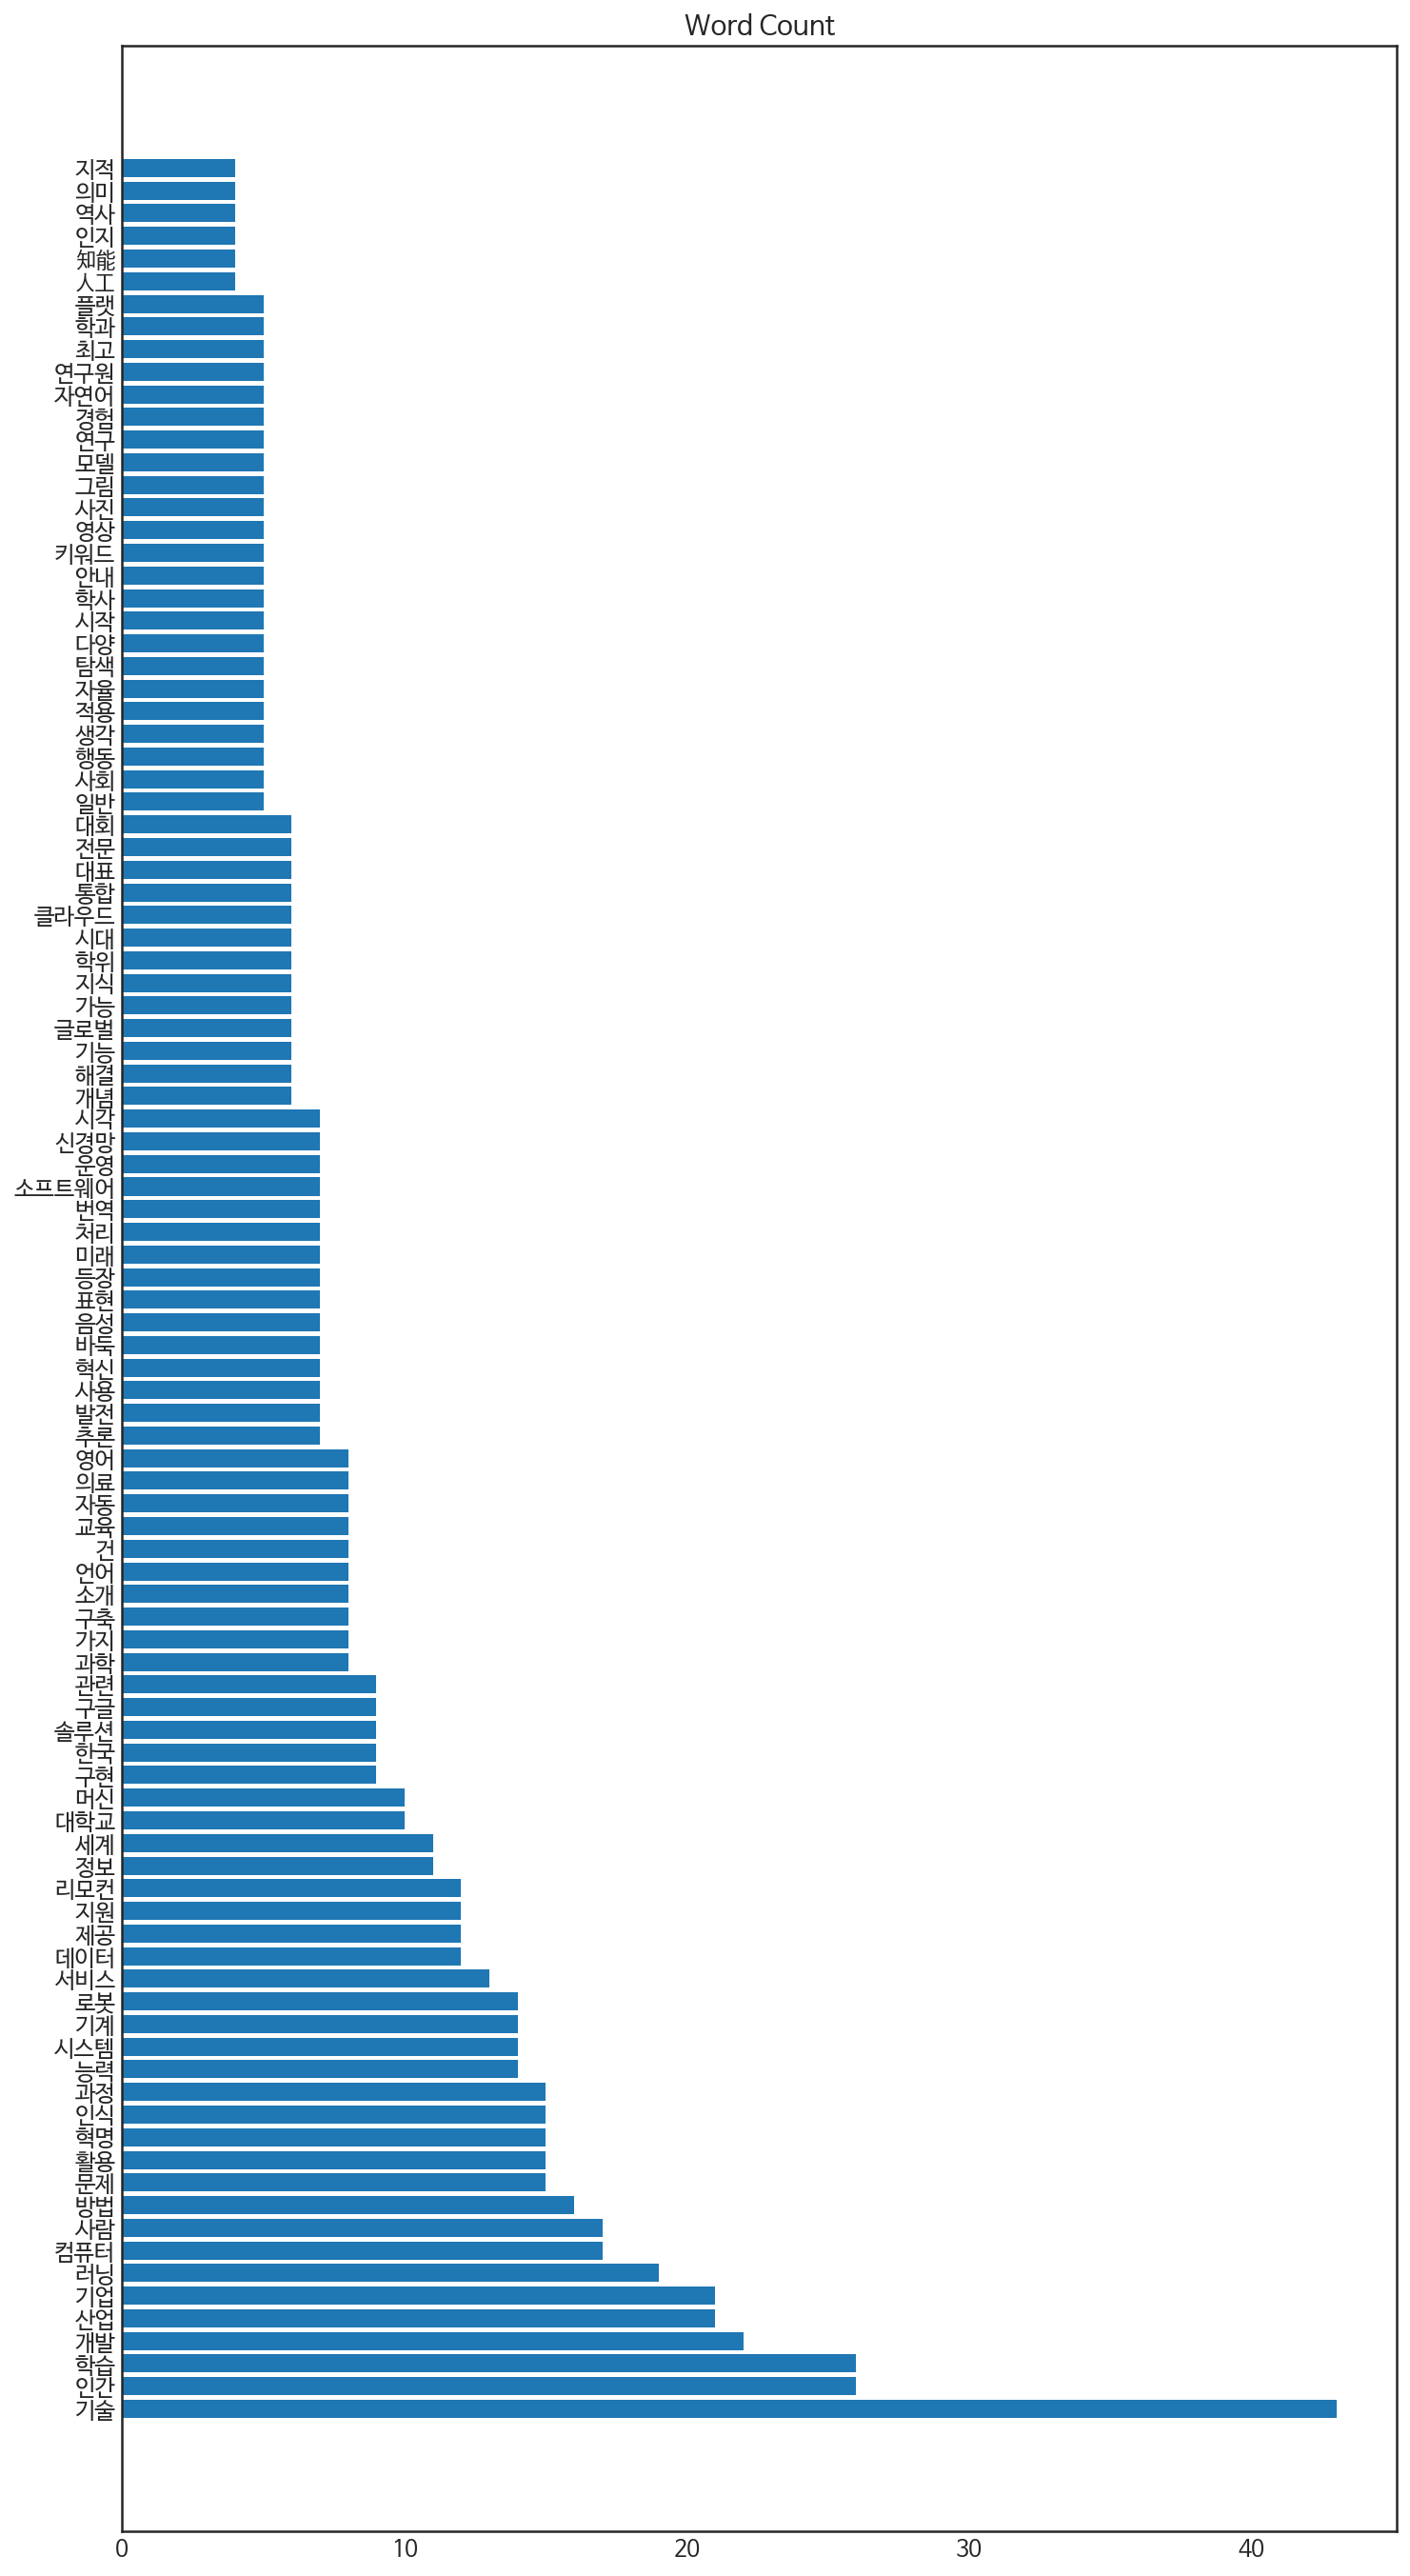

In [ ]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_web_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos, top_web_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_web_nouns.keys())
plt.show()

### 트리맵 시각화

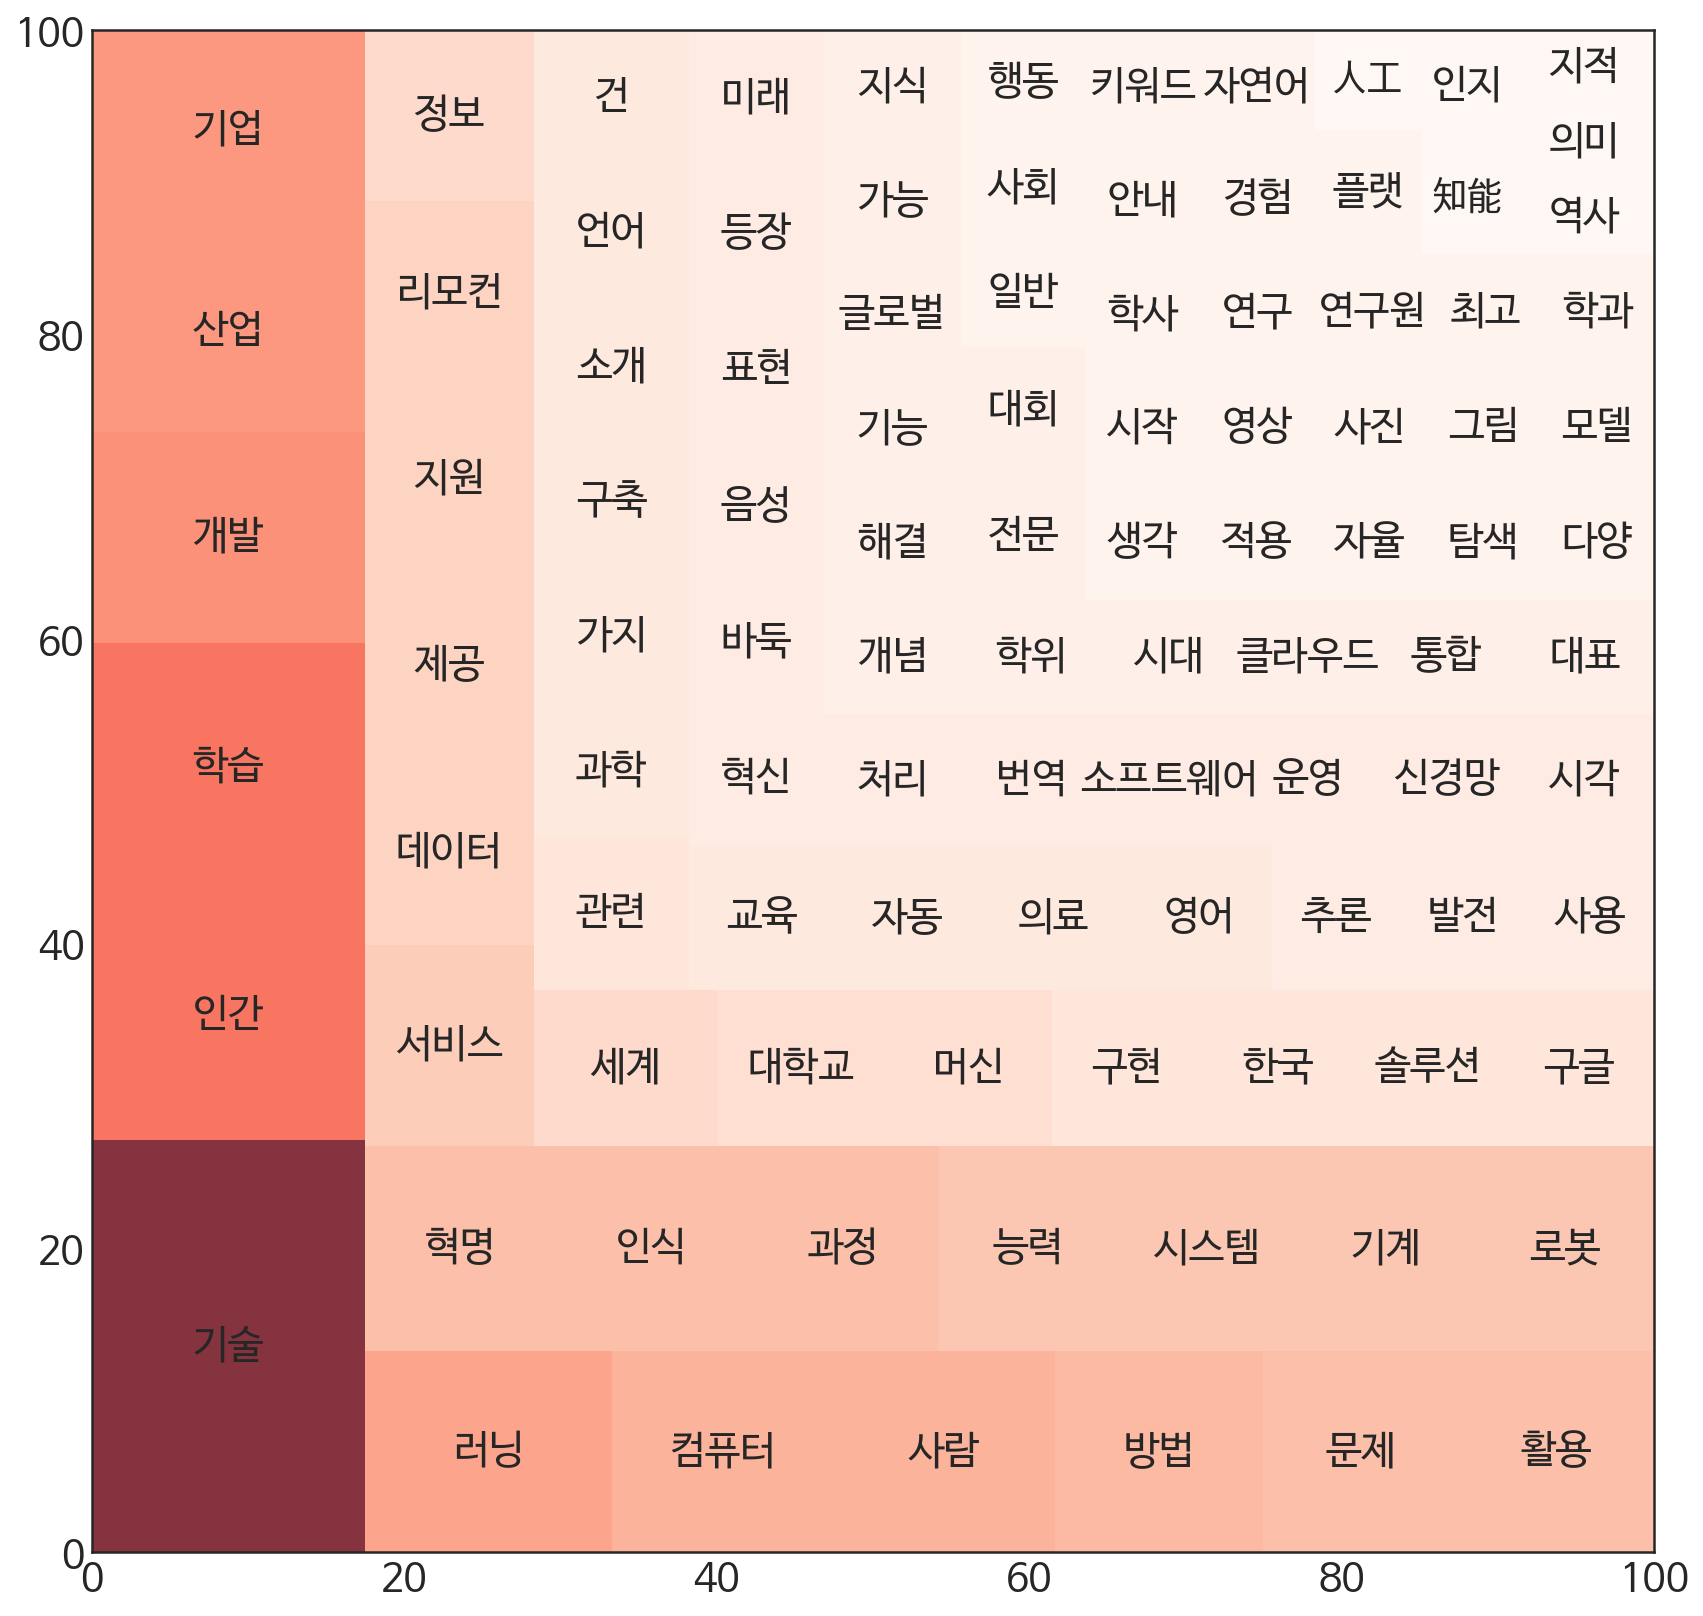

In [ ]:
plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_web_nouns.values()), vmax=max(top_web_nouns.values()) )

colors = [mpl.cm.Reds(norm(value)) for value in top_web_nouns.values()]

squarify.plot(label=top_web_nouns.keys(),
              sizes=top_web_nouns.values(),
              color=colors,
              alpha=.8)

### 워드클라우드 시각화

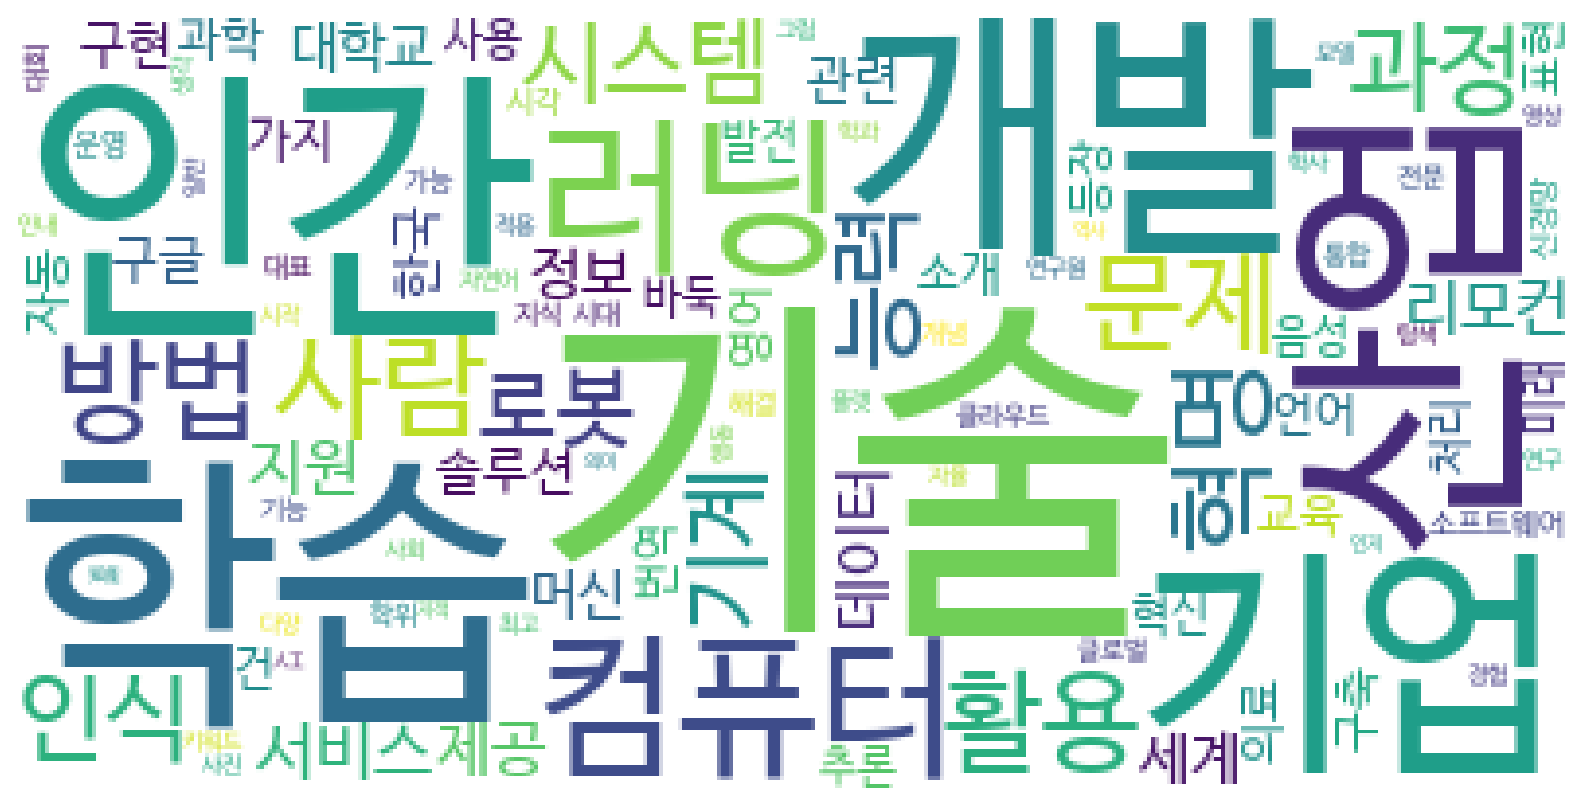

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_web_nouns)

figure = plt.figure(figsize=(14,14))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()



## 네이버 뉴스 키워드 분석

### 네이버 뉴스 검색 API

In [ ]:
import os, sys, urllib.request, json, re
import pandas as pd

query = urllib.parse.quote(input('검색 질의: '))
idx = 0  # news_df 의 length
display=100
start = 1
end = 1000
sort='sim'


news_df = pd.DataFrame(columns=['Title','OriginalLink','Link','Description','PublicationDate'])

for start_index in range(start, end, display):
    url = 'https://openapi.naver.com/v1/search/news?query=' + query \
        + '&display=' + str(display) + '&start=' + str(start_index) +'&sort=' + sort
    
    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)   # header에 id 넣기
    request.add_header('X-Naver-Client-Secret', client_secret) 
    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if (rescode==200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']

        # 불필요한 정보 삭제
        for item_index in range(0, len(items)):
            remove_tag = re.compile('<.*?>')  # 불필요한 태그  정규 표현식
            title = re.sub(remove_tag, '', items[item_index]['title']) # items[item_index]['title']값의 불필요한 태그를 ''으로 대체
            original_link = items[item_index]['originallink']
            link = items[item_index]['link']
            description = re.sub(remove_tag,'',items[item_index]['description'])
            pub_date = items[item_index]['pubDate']

            news_df.loc[idx] = [title, original_link,link, description, pub_date]  # df에 넣기
            idx += 1

    else:
        print("Error Code : " + rescode)


news_df

검색 질의: 환율


,Title,OriginalLink,Link,Description,PublicationDate
0,&quot;환율의 수출증대 효과 과거만큼 크지 않아…2010년 이후 약화&quot;,https://www.yna.co.kr/view/AKR2022101906640000...,https://n.news.naver.com/mnews/article/001/001...,산업연구원 분석…&quot;환율 변동에 의존하지 않는 구조 바람직&quot; 최근 ...,"Wed, 19 Oct 2022 11:03:00 +0900"
1,&apos;환율 하락 마감&apos;,http://www.newsis.com/view/?id=NISI20221018_00...,https://n.news.naver.com/mnews/article/003/001...,원·달러 환율이 전 거래일(1435.3원)보다 12.6원 떨어진 1422.7원에 마...,"Tue, 18 Oct 2022 15:57:00 +0900"
2,&quot;2010년까지는 원화 가치 떨어지면 수출↑…환율 영향 약화 추세&quot;,https://www.news1.kr/articles/4837231,https://n.news.naver.com/mnews/article/421/000...,실질실효환율(수출제품의 가격경쟁력)이 우리나라 수출에 미치는 영향이 2010년 이후...,"Wed, 19 Oct 2022 13:53:00 +0900"
3,"애플, 아이패드는 ‘USB-C’, 프로는 ‘M2칩’ 탑재... 高환율에 가격 인상",https://biz.chosun.com/it-science/ict/2022/10/...,https://n.news.naver.com/mnews/article/366/000...,"아이패드 프로의 미국 가격은 동결됐으나, 국내 출시가는 고환율 상황의 영향으로 25...","Wed, 19 Oct 2022 10:04:00 +0900"
4,"[외환마감]환율, 弱달러에 12원 이상 급락…1420원대 하락 전환",http://www.edaily.co.kr/news/newspath.asp?news...,https://n.news.naver.com/mnews/article/018/000...,원·달러 환율이 12원 이상 급락하면서 1420원대로 떨어졌다. 영국이 대규모 감세...,"Tue, 18 Oct 2022 15:56:00 +0900"
...,...,...,...,...,...
995,"달러·원 환율, 13년6개월여만에 최고…1440원 돌파",https://www.news1.kr/articles/4816280,https://n.news.naver.com/mnews/article/421/000...,28일 달러·원 환율이 1440원을 돌파하며 이틀 만에 연고점을 새로 썼다. 서울외...,"Wed, 28 Sep 2022 11:24:00 +0900"
996,"[오늘의 금값]순금(24K) 한돈, 18K, 14K, 은 등 10월 16일 금시세와...",http://www.economytalk.kr/news/articleView.htm...,http://www.economytalk.kr/news/articleView.htm...,환율이란 외국 돈을 살 때 지불하는 외국 돈의 가격을 환율이라 한다. 달러당 환율이...,"Sun, 16 Oct 2022 13:04:00 +0900"
997,"코스피 장 초반 2200선 무너져, 환율은 1430원 돌파",https://www.news1.kr/photos/view/?5621164,https://n.news.naver.com/mnews/article/421/000...,원달러 환율 등이 표시되고 있다. 이날 코스피는 39.82포인트(1.78%) 하락한...,"Tue, 11 Oct 2022 09:31:00 +0900"
998,"[환율 1400원시대] 원/달러 환율, 혼조세…장 초반 1420원대로 하락",http://www.inews24.com/view/1528387,https://n.news.naver.com/mnews/article/031/000...,상승 출발한 원/달러 환율이 1천420원대로 물러났다가 회복하며 혼조세를 보이고 있...,"Fri, 14 Oct 2022 09:56:00 +0900"


In [ ]:
news = []
for title in news_df.Title:
    news.append(title)

print(news[:5])

['&quot;환율의 수출증대 효과 과거만큼 크지 않아…2010년 이후 약화&quot;', '&apos;환율 하락 마감&apos;', '&quot;2010년까지는 원화 가치 떨어지면 수출↑…환율 영향 약화 추세&quot;', '애플, 아이패드는 ‘USB-C’, 프로는 ‘M2칩’ 탑재... 高환율에 가격 인상', '[외환마감]환율, 弱달러에 12원 이상 급락…1420원대 하락 전환']


### 형태소 분석을 이용한 명사 추출


In [ ]:
stop_words = '삼성 청년 소프트웨어 아카데미 ssafy SW sw SSAFY 삼성청년 삼성전자 기 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번'
stop_words = stop_words.split()

from konlpy.tag import Mecab

tagger = Mecab()
news_nouns = []
for n in news:
    for noun in tagger.nouns(n):
        if noun not in stop_words:
            news_nouns.append(noun)
news_nouns[:10]

['환율', '수출', '증대', '효과', '과거', '이후', '약화', '환율', '하락', '마감']

### 단어 빈도수 측정

In [ ]:
from collections import Counter
news_nouns_count = Counter(news_nouns)
top_news_nouns = dict(news_nouns_count.most_common(100))
top_news_nouns

{'환율': 999,
 '달러': 446,
 '상승': 213,
 '엔': 157,
 '코스피': 147,
 '물가': 138,
 '마감': 137,
 '하락': 129,
 '출발': 107,
 '만': 102,
 '급등': 91,
 '원대': 89,
 '돌파': 81,
 '외환': 73,
 '금리': 60,
 '수입': 58,
 '스텝': 53,
 '코스닥': 50,
 '전망': 42,
 '방어': 38,
 '달': 37,
 '장중': 37,
 '美': 36,
 '분기': 34,
 '지수': 34,
 '금': 33,
 '보유': 33,
 '액': 32,
 '전환': 30,
 '수출': 29,
 '영향': 29,
 '오늘': 28,
 '경제': 27,
 '日': 26,
 '종합': 26,
 '안정': 26,
 '시장': 25,
 '변동': 25,
 '한은': 25,
 '한': 24,
 '시세': 23,
 '아래': 23,
 '가치': 21,
 '개입': 21,
 '증시': 21,
 '폭': 21,
 '효과': 20,
 '인상': 20,
 '붕괴': 20,
 '통': 20,
 '위': 20,
 '긴축': 19,
 '가능': 19,
 '이창용': 19,
 '후': 18,
 '불안': 18,
 '기준': 18,
 '가격': 17,
 '급감': 17,
 '금융': 17,
 '정책': 17,
 '최고': 17,
 '지속': 17,
 '급': 17,
 '위안': 17,
 '우려': 16,
 '추경호': 16,
 '경기': 16,
 '킹': 15,
 '유출': 15,
 '시황': 15,
 '통화': 15,
 '연고': 15,
 '점': 15,
 '시대': 15,
 '속보': 15,
 '위기': 15,
 '동반': 15,
 '대응': 14,
 '투자': 14,
 '추가': 14,
 '압력': 14,
 '금값': 14,
 '거래일': 14,
 '순금': 14,
 '급락': 13,
 '자본': 13,
 '달러환': 13,
 '악화': 13,
 '하루': 13,
 '빅스': 13

### 단어 빈도 시각화

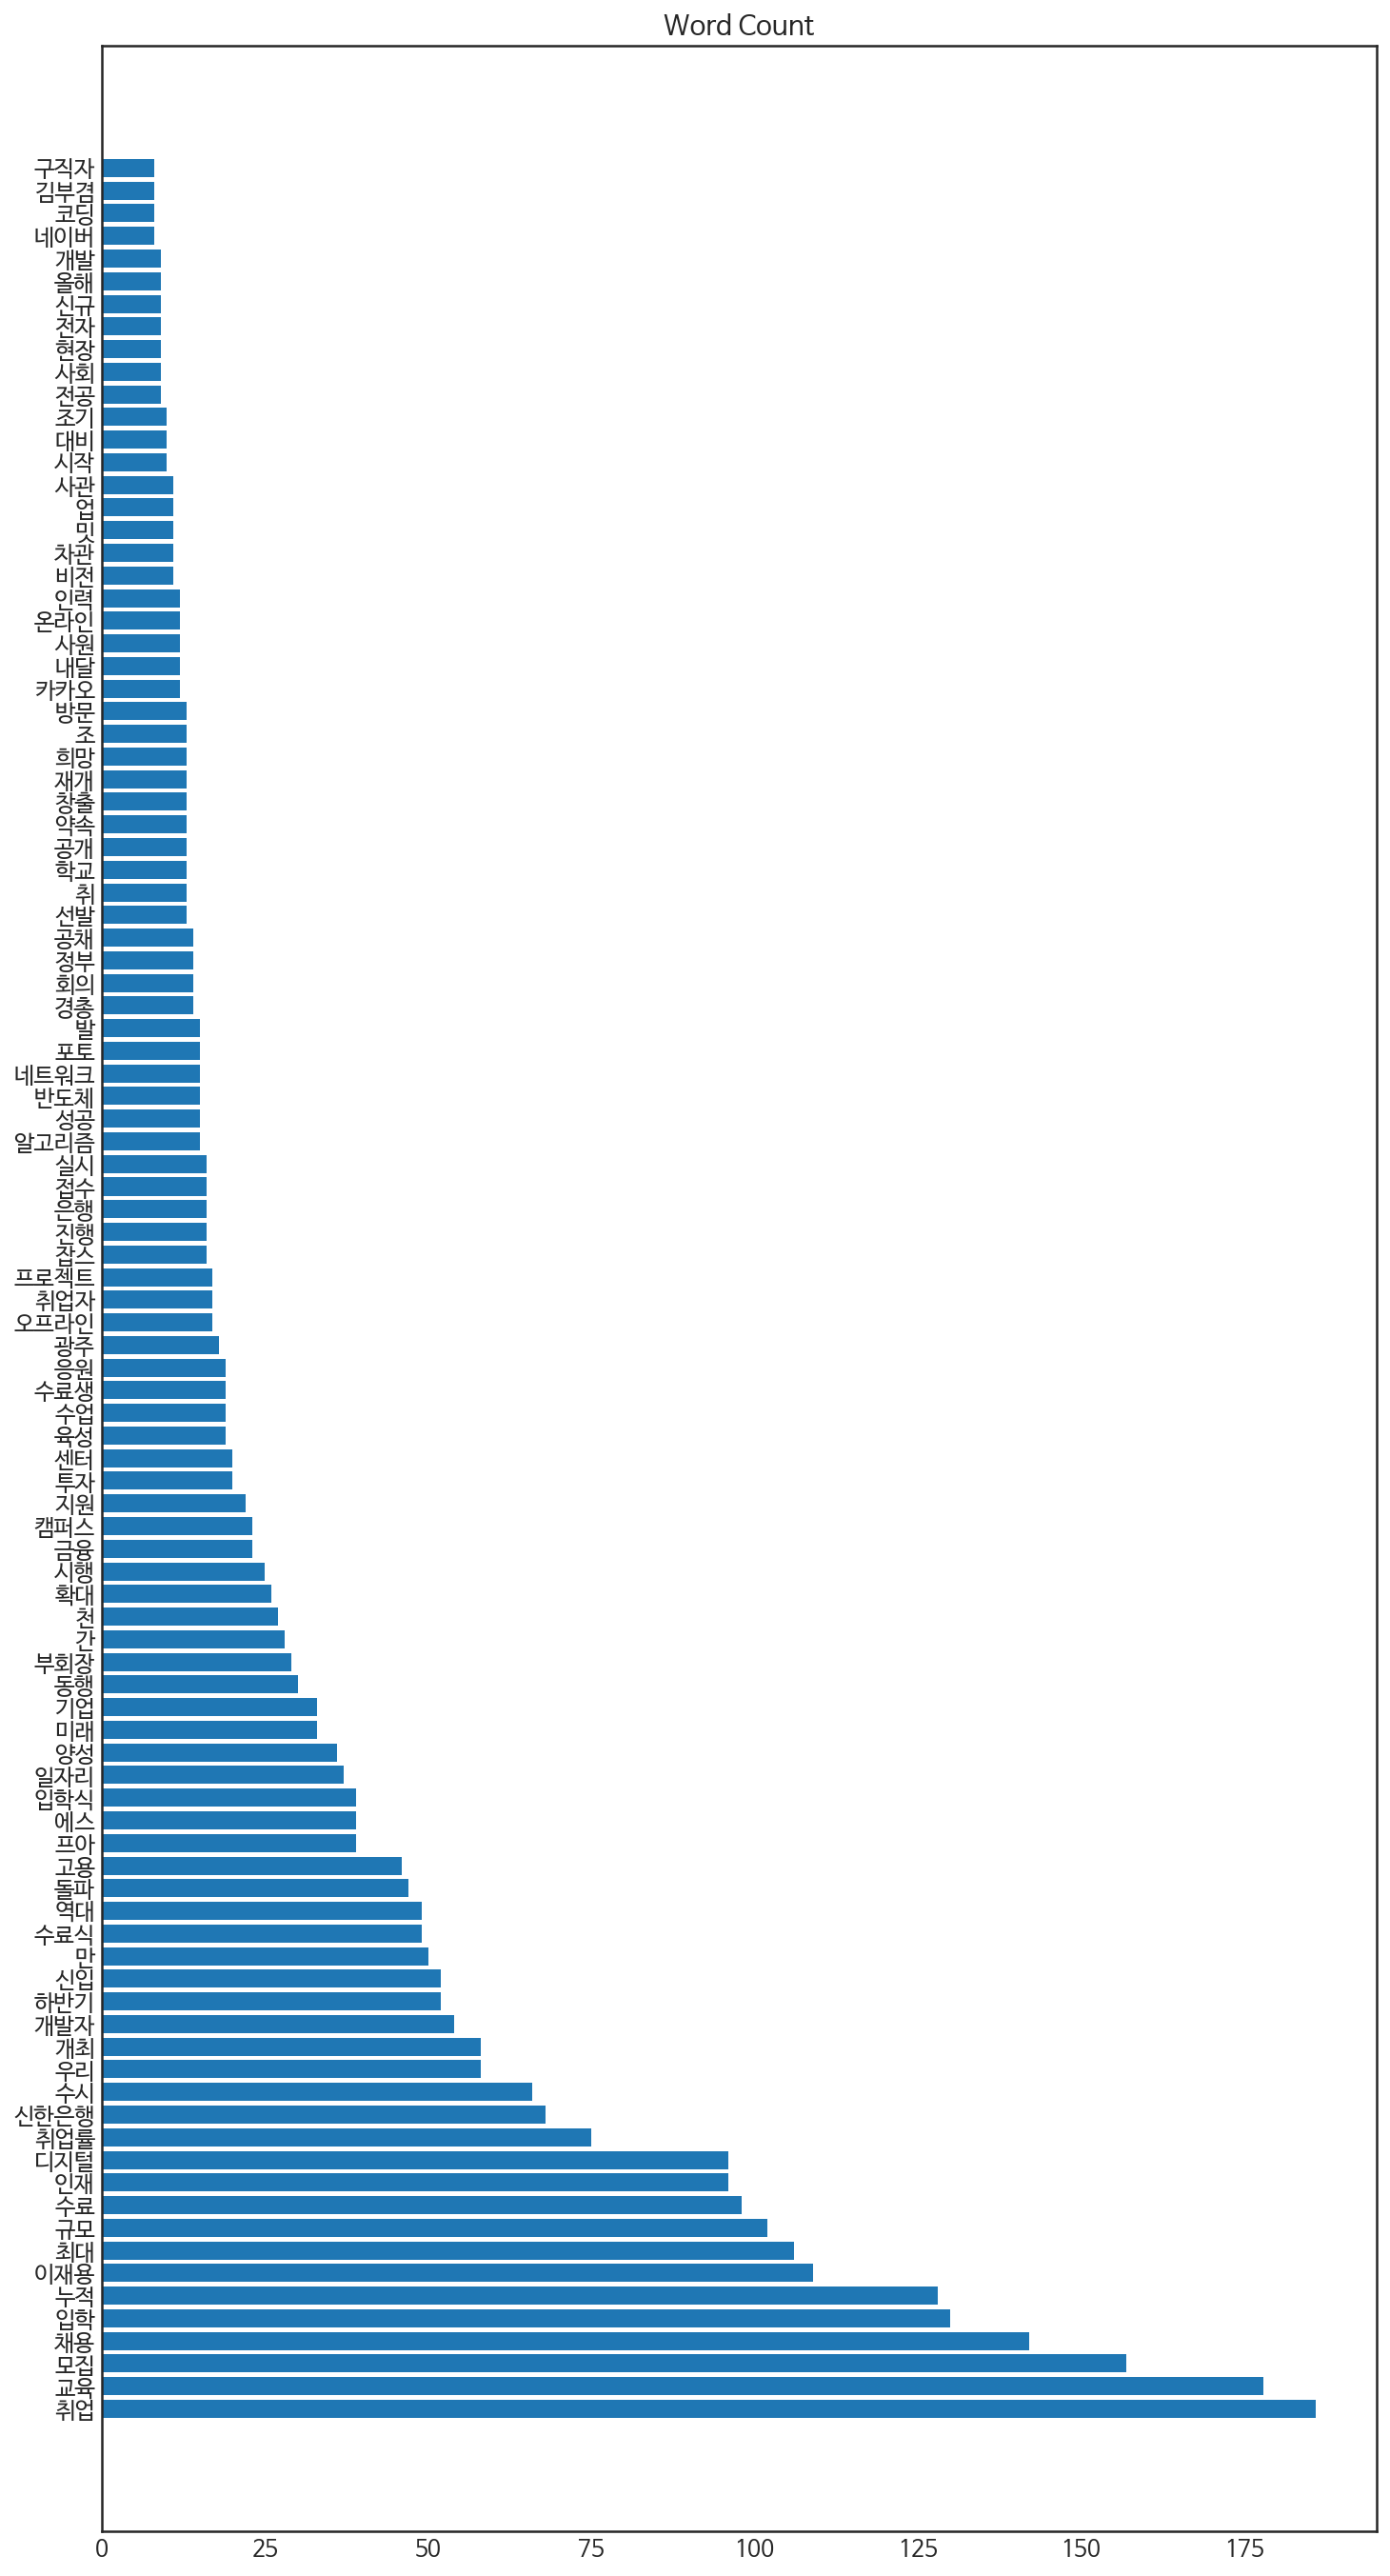

In [ ]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_news_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos, top_news_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_news_nouns.keys())
plt.show()

### 트리맵 시각화

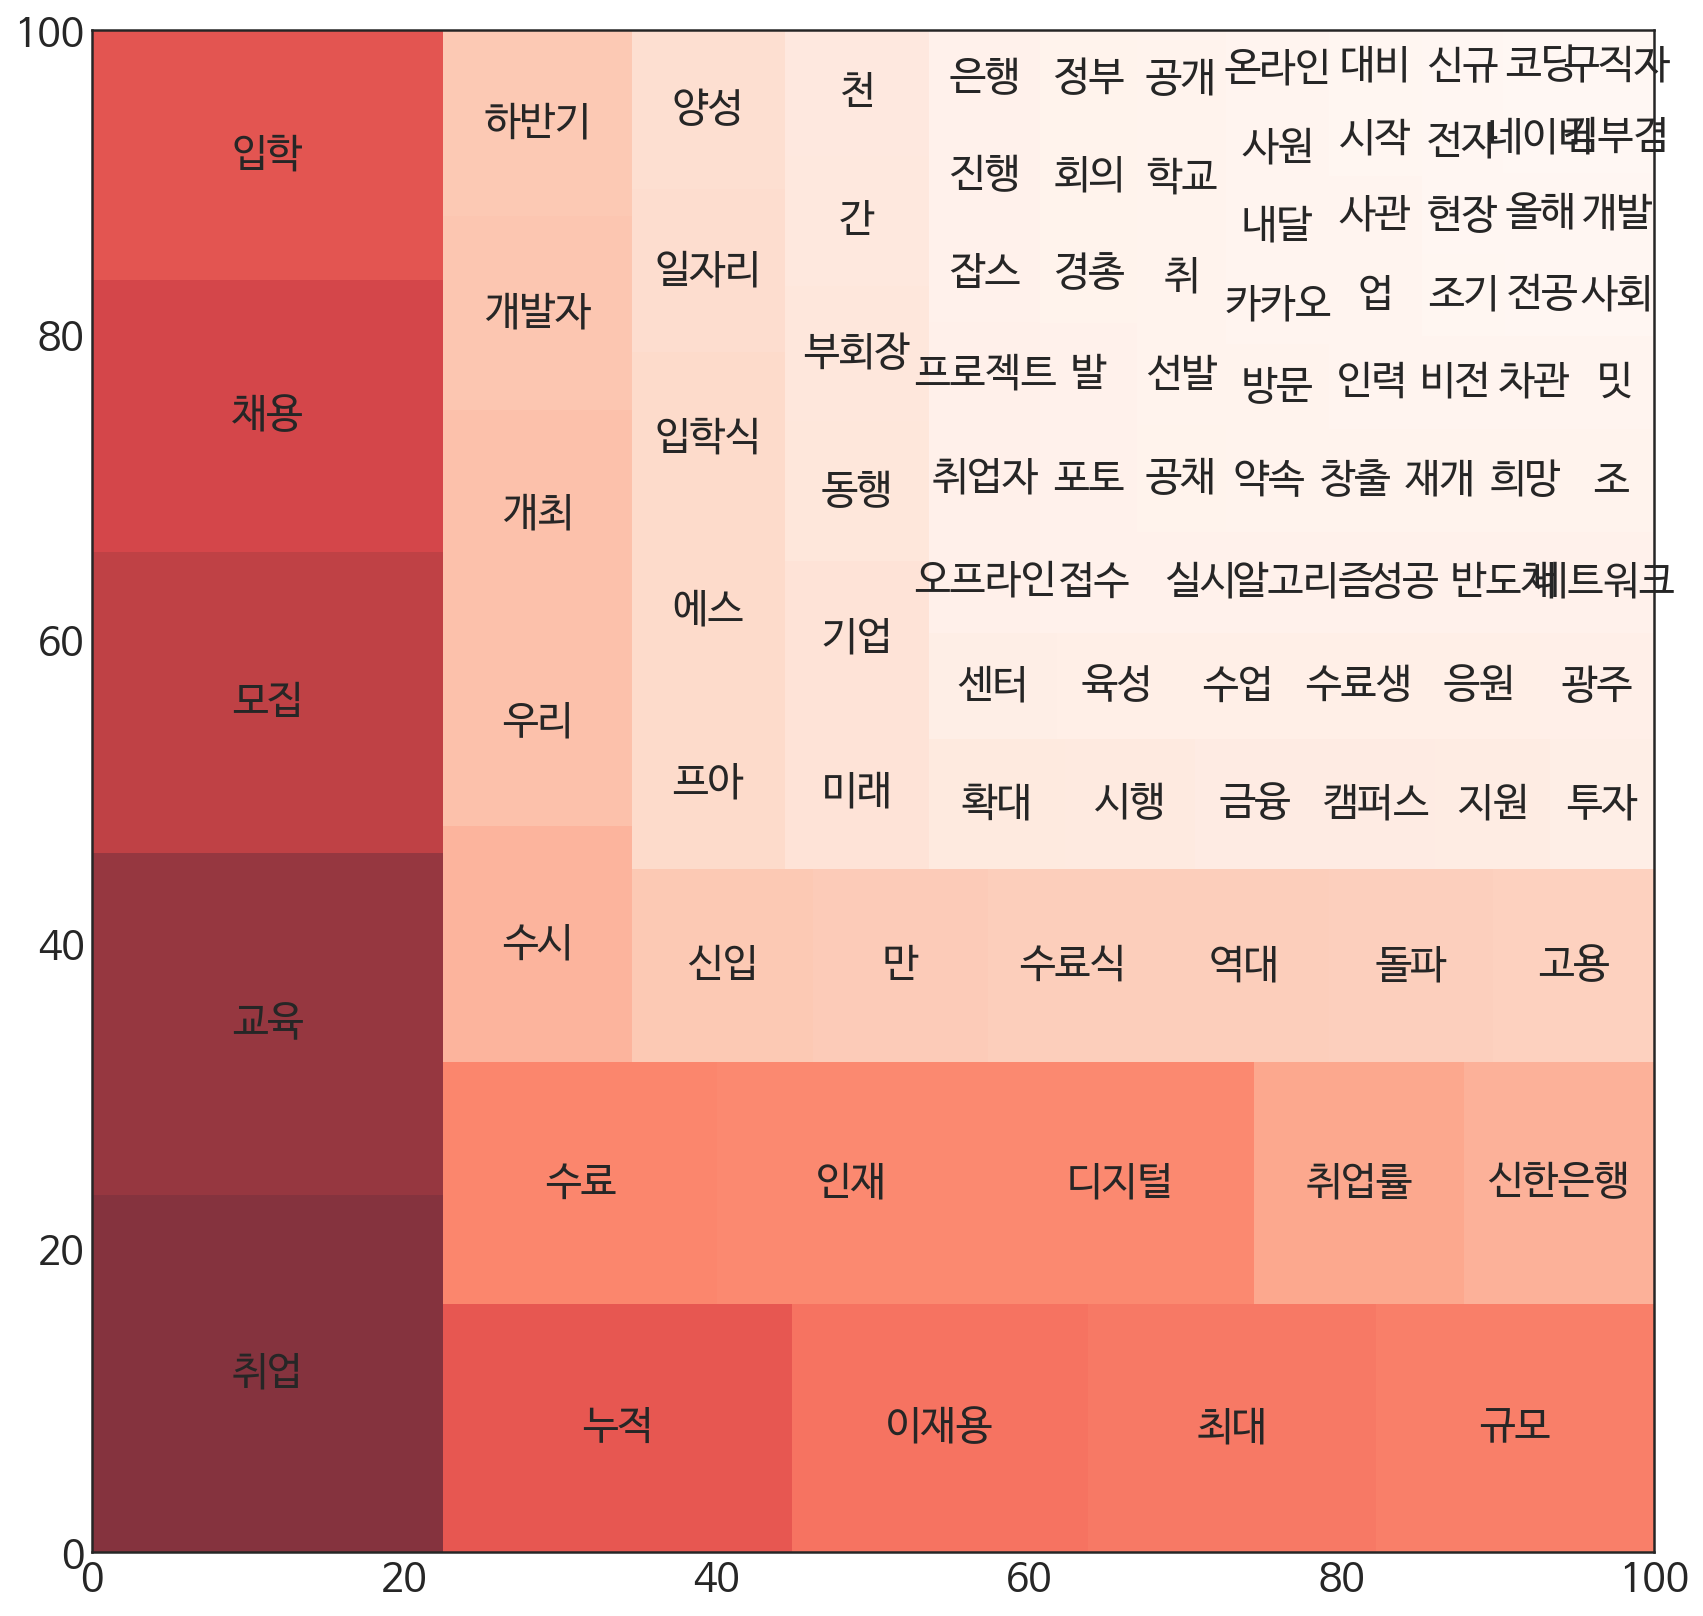

In [ ]:
plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_news_nouns.values()), vmax=max(top_news_nouns.values()) )

colors = [mpl.cm.Reds(norm(value)) for value in top_news_nouns.values()]

squarify.plot(label=top_news_nouns.keys(),
              sizes=top_news_nouns.values(),
              color=colors,
              alpha=.8)

### 워드클라우드 시각화

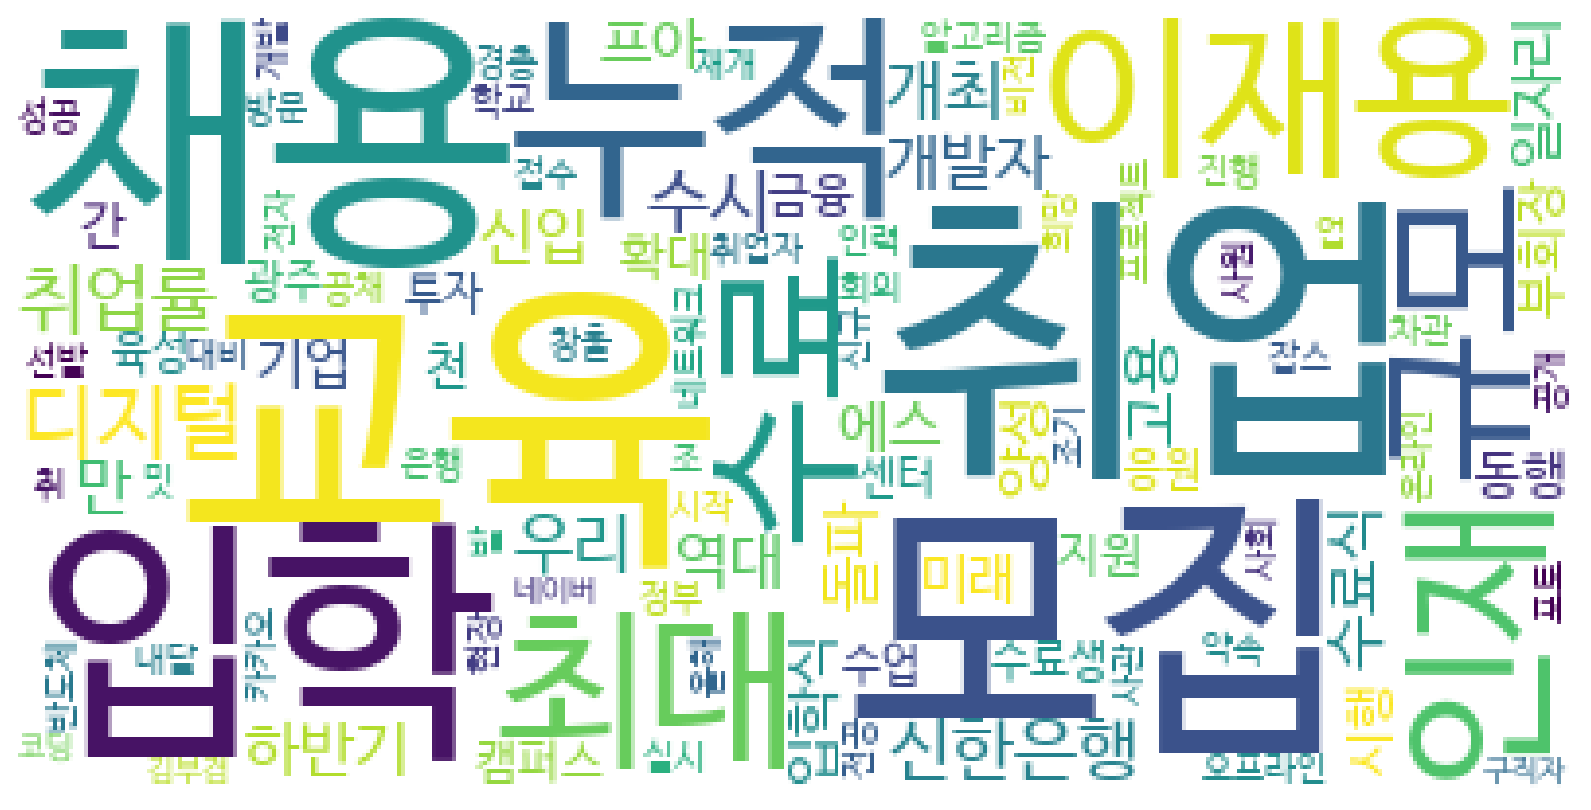

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_news_nouns)


figure = plt.figure(figsize=(14,14))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()



## 네이버 블로그 키워드 분석

### 네이버 블로그 검색 API

In [ ]:
import os, sys, urllib.request, json, re
import pandas as pd

query = urllib.parse.quote(input('검색 질의: '))
idx = 0  # blog_df 의 length
display=100
start = 1
end = 1000
sort='sim'

blog_df = pd.DataFrame(columns=['Title','Link','Description','BloggerName','BloggerLink'])

for start_index in range(start, end, display):
    url = 'https://openapi.naver.com/v1/search/blog?query=' + query \
        + '&display=' + str(display) + '&start=' + str(start_index) +'&sort=' + sort
    
    request = urllib.request.Request(url)
    request.add_header('X-Naver-Client-Id', client_id)   # header에 id 넣기
    request.add_header('X-Naver-Client-Secret', client_secret) 
    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if (rescode==200):
        response_body = response.read()
        response_dict = json.loads(response_body.decode('utf-8'))
        items = response_dict['items']

        # 불필요한 정보 삭제
        for item_index in range(0, len(items)):
            remove_tag = re.compile('<.*?>')  # 불필요한 태그  정규 표현식
            title = re.sub(remove_tag, '', items[item_index]['title']) # items[item_index]['title']값의 불필요한 태그를 ''으로 대체
            link = items[item_index]['link']
            description = re.sub(remove_tag,'',items[item_index]['description'])
            blogger_name = items[item_index]['bloggername']
            blogger_link = items[item_index]['bloggerlink']

            blog_df.loc[idx] = [title ,link, description, blogger_name, blogger_link]  # df에 넣기
            idx += 1

    else:
        print("Error Code : " + rescode)


blog_df

검색 질의: ssafy


,Title,Link,Description,BloggerName,BloggerLink
0,SSAFY 8기 최종 합격 수기 (기초코딩테스트 전공자 합격 꿀팁),https://blog.naver.com/algorithmjobs/222883377876,안녕하세요 오늘은 알고리즘잡스에서 SSAFY 합격케어 패키지를 수강하고 전공자 #기...,알고리즘잡스 공식블로그,blog.naver.com/algorithmjobs
1,[부트캠프] 비전공자 싸피(SSAFY) 7기 합격 후기/자소서 서류...,https://blog.naver.com/cdh623/222612266887,"싸피(SSAFY) 서류 제출, 그리고 제가 생각한 좋은 에세이 흐름은요... 싸피(...",라혜답게,blog.naver.com/cdh623
2,삼성SSAFY 아카데미 적성진단 단권으로 마스터,https://blog.naver.com/mirr7982/222902338102,저는 이번에 개인적으로 준비하고 있는 삼성SSAFY 공략에 많은 시간을 투자하고 있...,취업 희망의 불씨를 키우다,blog.naver.com/mirr7982
3,SSAFY(삼성 청년 sw 아카데미) 7기 비전공 지원 후기,https://blog.naver.com/wkdus885/222588350453,ssafy란? 삼성과 고용노동부가 손잡고 만 29세 미만 청년들을 위해 매월 100...,"자유, 그 위로 가자",blog.naver.com/wkdus885
4,SSAFY 9기 합격꿀팁,https://blog.naver.com/dlwltmf/222861215074,삼성 청년 소프트웨어 아카데미 SSAFY에 대해 궁금해 하시는 분들이 많아졌는데요....,첫 눈 같았던 추억을 기록해두는 곳,blog.naver.com/dlwltmf
...,...,...,...,...,...
995,"Welcome, SSAFY!",https://blog.naver.com/piq2255/222625140541,아 기다리고 아 기다리던 싸피 입학식 사실 붙을 줄 모르고 졸업을 준비하지 않았던 ...,From Record To Miracle,blog.naver.com/piq2255
996,SSAFY 6주차 소감,https://blog.naver.com/good5229/222241971148,설 연휴 때문에 3일만 수업하고 6주차가 끝났다. 올ㅋ 썸네일 알고리즘 이전까지의 ...,Bellhundred&apos;s DATA,blog.naver.com/good5229
997,뉴노멀 시대 주도할 소프트웨어 인재 여기에… SSAFY 5기 모집,https://blog.naver.com/kun5830/222122622533,실전형 소프트웨어 인재 양성을 위한 삼성 청년 소프트웨어 아카데미(Samsung S...,문학을 IT다 - 문학을 잇다,blog.naver.com/kun5830
998,[SSAFY] 서류 합격 그리고 면접 후기,https://blog.naver.com/cg1735/222595100947,[SW 적성진단 결과 안내]의 제목으로 문자 한통이 왔다. 적성 진단을 치룬지 약 ...,IT-marathoner,blog.naver.com/cg1735


In [ ]:
blog = []
for b in blog_df.Description:
    blog.append(b)
print(blog[:5])

['안녕하세요 오늘은 알고리즘잡스에서 SSAFY 합격케어 패키지를 수강하고 전공자 #기초코딩테스트 를 통과하고 #SSAFY 8기에 당당이 합격한 전공생의 생생한 후기를 가져왔습니다 전공자다보니 주변에 SSAFY를... ', '싸피(SSAFY) 서류 제출, 그리고 제가 생각한 좋은 에세이 흐름은요... 싸피(SSAFY)는 삼성이 주관하고 고용노동부가 후원하는 전문 소프트웨어 엔지니어를 양성하는 프로그램으로, 일 년에 두 번(상반기... ', '저는 이번에 개인적으로 준비하고 있는 삼성SSAFY 공략에 많은 시간을 투자하고 있는데 SSAFY는 삼성의 현업 소프트웨어 교육을 배울 수 있어 취업준비생 사이에서 대기업 취업 등용문으로 통하고 있기에 코딩... ', 'ssafy란? 삼성과 고용노동부가 손잡고 만 29세 미만 청년들을 위해 매월 100만 원의 교육지원금을 주며 sw... ssafy의 교육과정 1년 동안 교육이 진행되며 1학기와 2학기로 교육과정이 나뉜다. 1학기는 알고리즘... ', '삼성 청년 소프트웨어 아카데미 SSAFY에 대해 궁금해 하시는 분들이 많아졌는데요. 아무래도 9기 모집을... 더군다나 SSAFY는 삼성 개발자가 되기 위한 등용문으로 자리매김하고 있으며, 수료생을 우대하는 기업이... ']


### 형태소 분석을 이용한 명사 추출


In [ ]:
stop_words = '삼성 청년 소프트웨어 아카데미 ssafy SW sw SSAFY 삼성청년 삼성전자 기 후 입 때 저 주 거 셜 만 간 게 수 것 등 기반 일 년 말 문 월 이 명 깨 개 중 범 부 딥 빅 책 분 봉 차 나 내 전 억 대 형 선 사 폼 원 번'
stop_words = stop_words.split()

tagger = Mecab()
blog_nouns = []
for n in blog:
    for noun in tagger.nouns(n):
        if noun not in stop_words:
            blog_nouns.append(noun)
blog_nouns[:10]

['안녕', '알고리즘', '잡스', '합격', '패키지', '수강', '전공', '기초', '코딩', '테스트']

### 단어 빈도수 측정

In [ ]:
blog_nouns_count = Counter(blog_nouns)
top_blog_nouns = dict(blog_nouns_count.most_common(100))
top_blog_nouns

{'교육': 311,
 '지원': 223,
 '피': 165,
 '학기': 163,
 '모집': 161,
 '준비': 154,
 '취업': 150,
 '적성': 141,
 '합격': 138,
 '면접': 138,
 '알고리즘': 134,
 '진행': 130,
 '시작': 129,
 '진단': 126,
 '후기': 117,
 '프로젝트': 117,
 '전공': 111,
 '코딩': 102,
 '과정': 95,
 '이번': 87,
 '잡스': 79,
 '글': 75,
 '시간': 71,
 '시험': 71,
 '생각': 70,
 '오늘': 64,
 '고용': 59,
 '문제': 59,
 '경험': 58,
 '입학식': 57,
 '수업': 57,
 '프로그램': 55,
 '달': 52,
 '개발자': 51,
 '노동부': 50,
 '사람': 50,
 '결과': 50,
 '관련': 50,
 '시': 49,
 '홈페이지': 48,
 '서울': 48,
 '공부': 47,
 '소개': 46,
 '온라인': 46,
 '캠퍼스': 46,
 '인터뷰': 46,
 '안녕': 44,
 '웰컴': 44,
 '기간': 44,
 '명회': 43,
 '역량': 42,
 '내용': 42,
 '끝': 42,
 '작성': 41,
 '때문': 41,
 '공식': 41,
 '대비': 41,
 '출처': 40,
 '비전': 40,
 '마지막': 40,
 '수료': 39,
 '반': 39,
 '정보': 39,
 '동안': 38,
 '관심': 38,
 '취': 38,
 '테스트': 37,
 '설': 37,
 '공자': 37,
 '일정': 37,
 '소식': 37,
 '자소': 37,
 '지원서': 36,
 '졸업': 35,
 '기사': 35,
 '제': 34,
 '블로그': 34,
 '참여': 33,
 '포스팅': 33,
 '입학': 32,
 '캠프': 32,
 '개발': 32,
 '키트': 31,
 '평가': 31,
 '하나': 31,
 '개월': 31,
 '이야기': 31,
 '학습': 31,
 '앞

### 단어 빈도 시각화

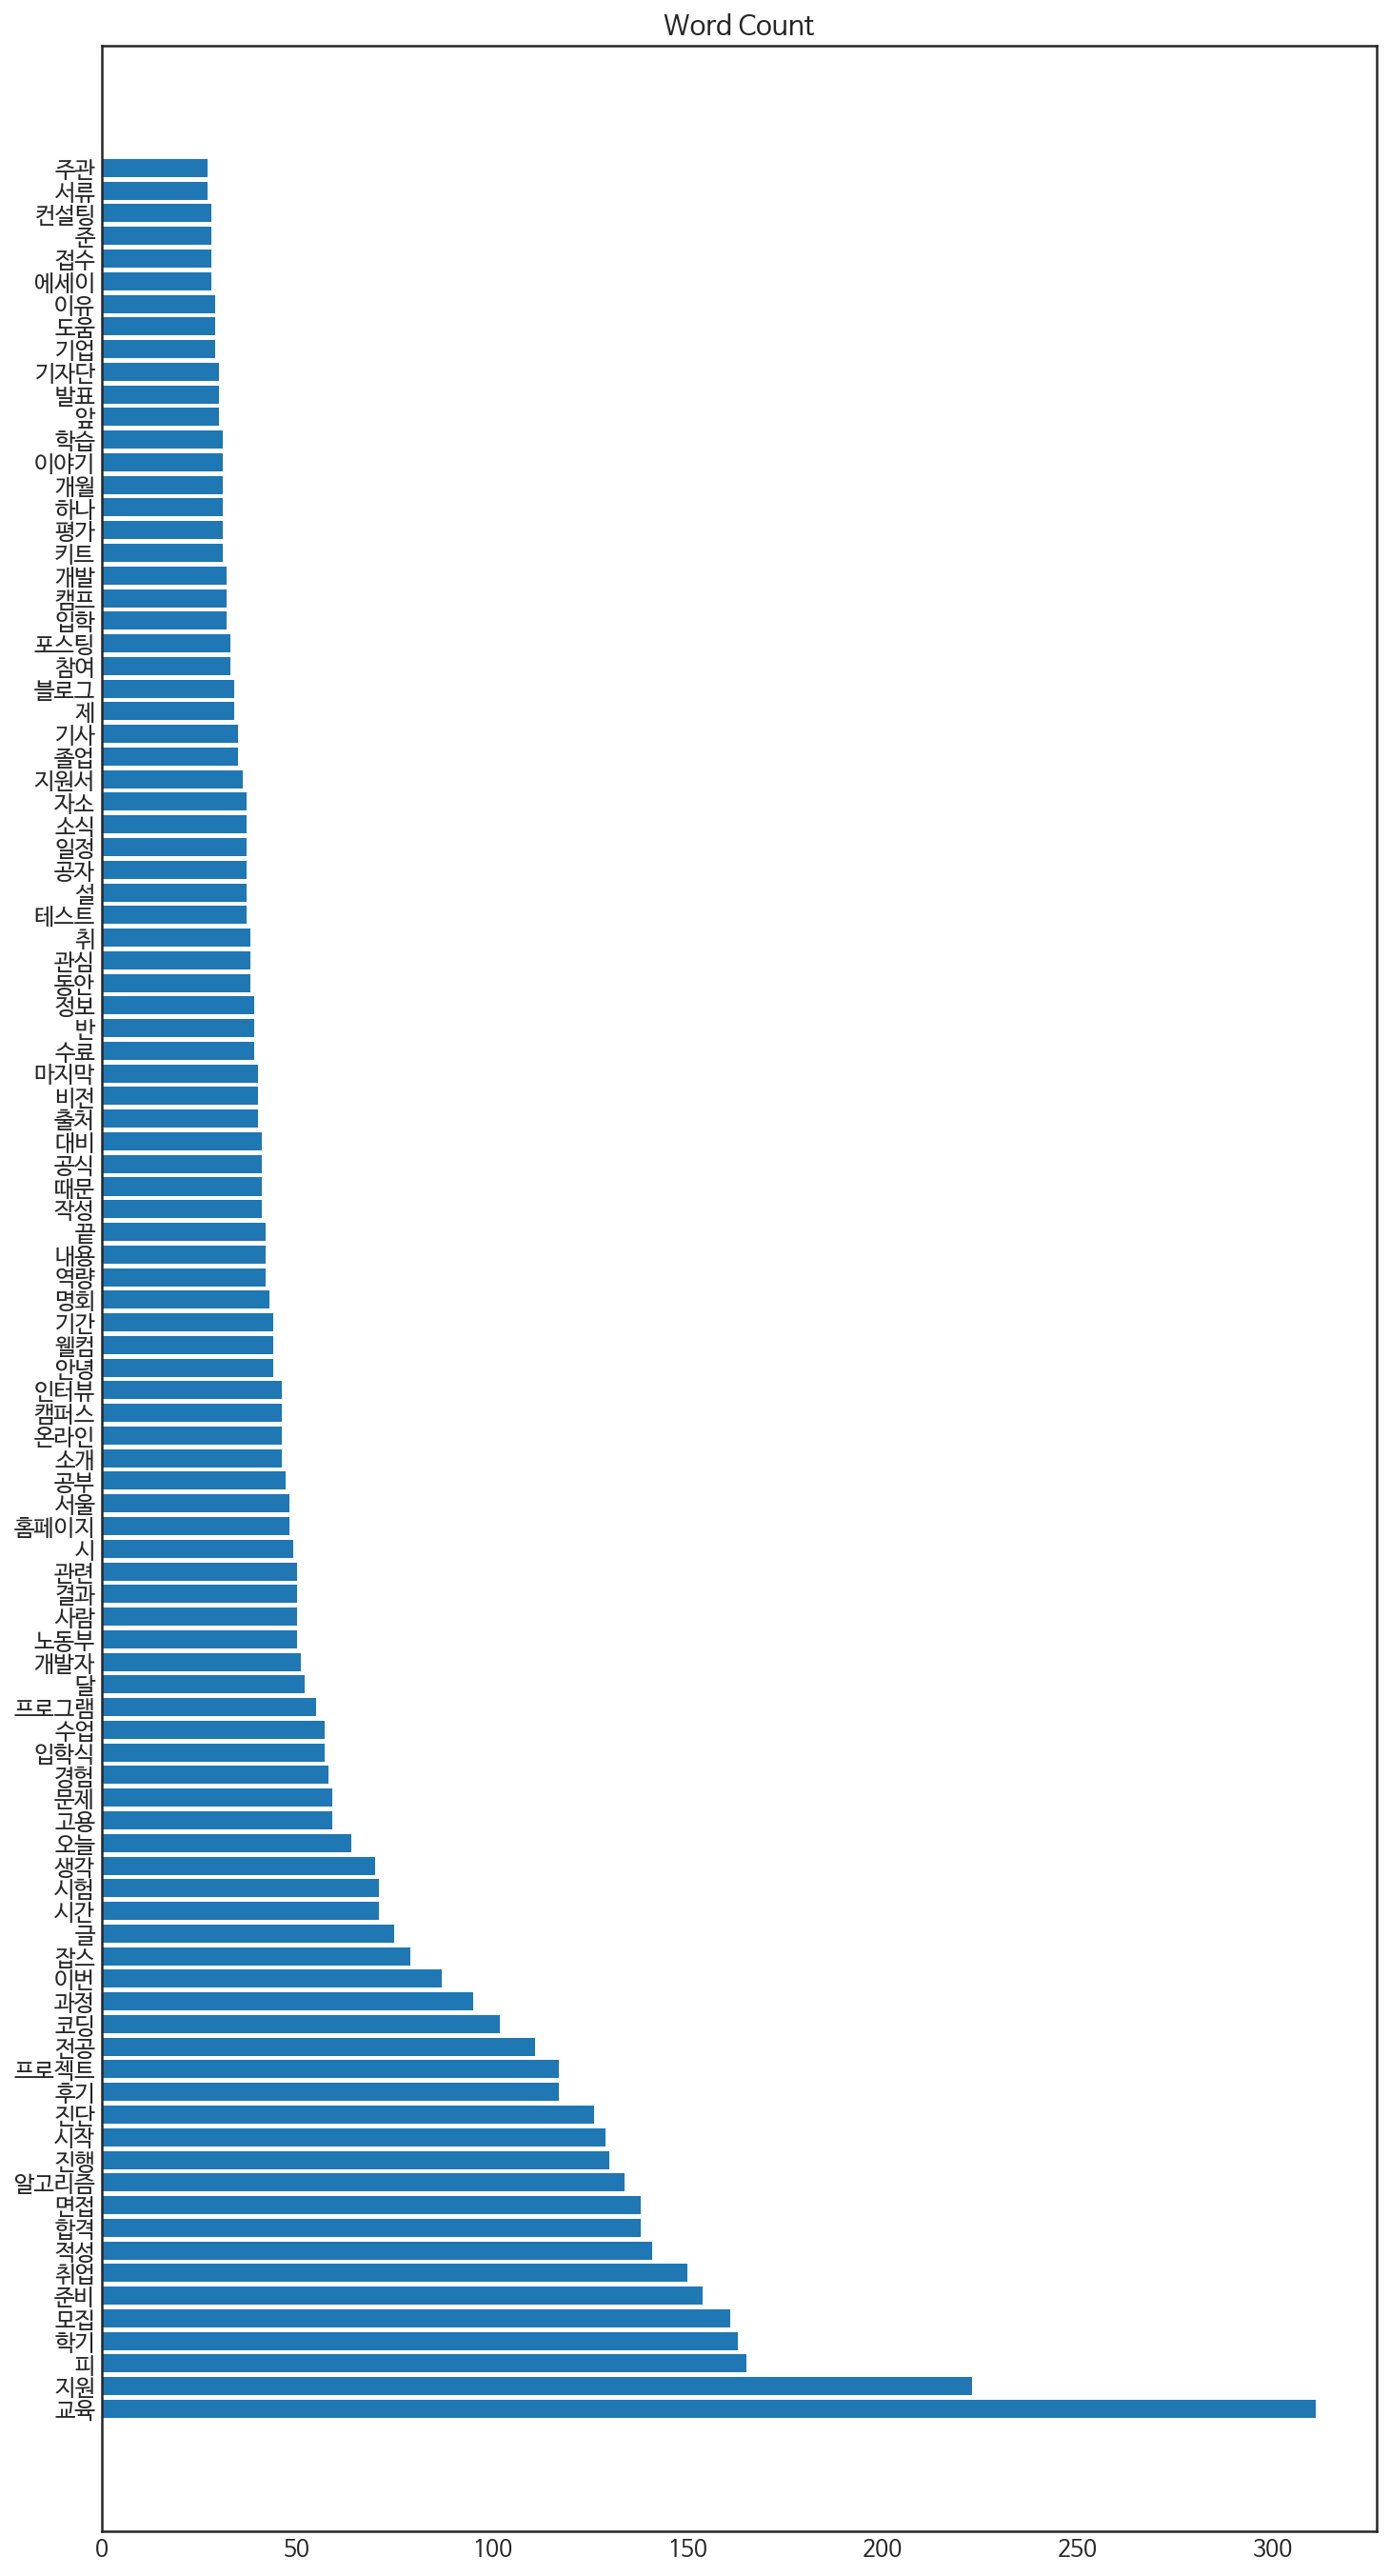

In [ ]:
plt.rcParams['font.size'] = 12

y_pos = np.arange(len(top_blog_nouns))

plt.figure(figsize=(12,24))
plt.barh(y_pos, top_blog_nouns.values())
plt.title('Word Count')
plt.yticks(y_pos, top_blog_nouns.keys())
plt.show()

### 트리맵 시각화

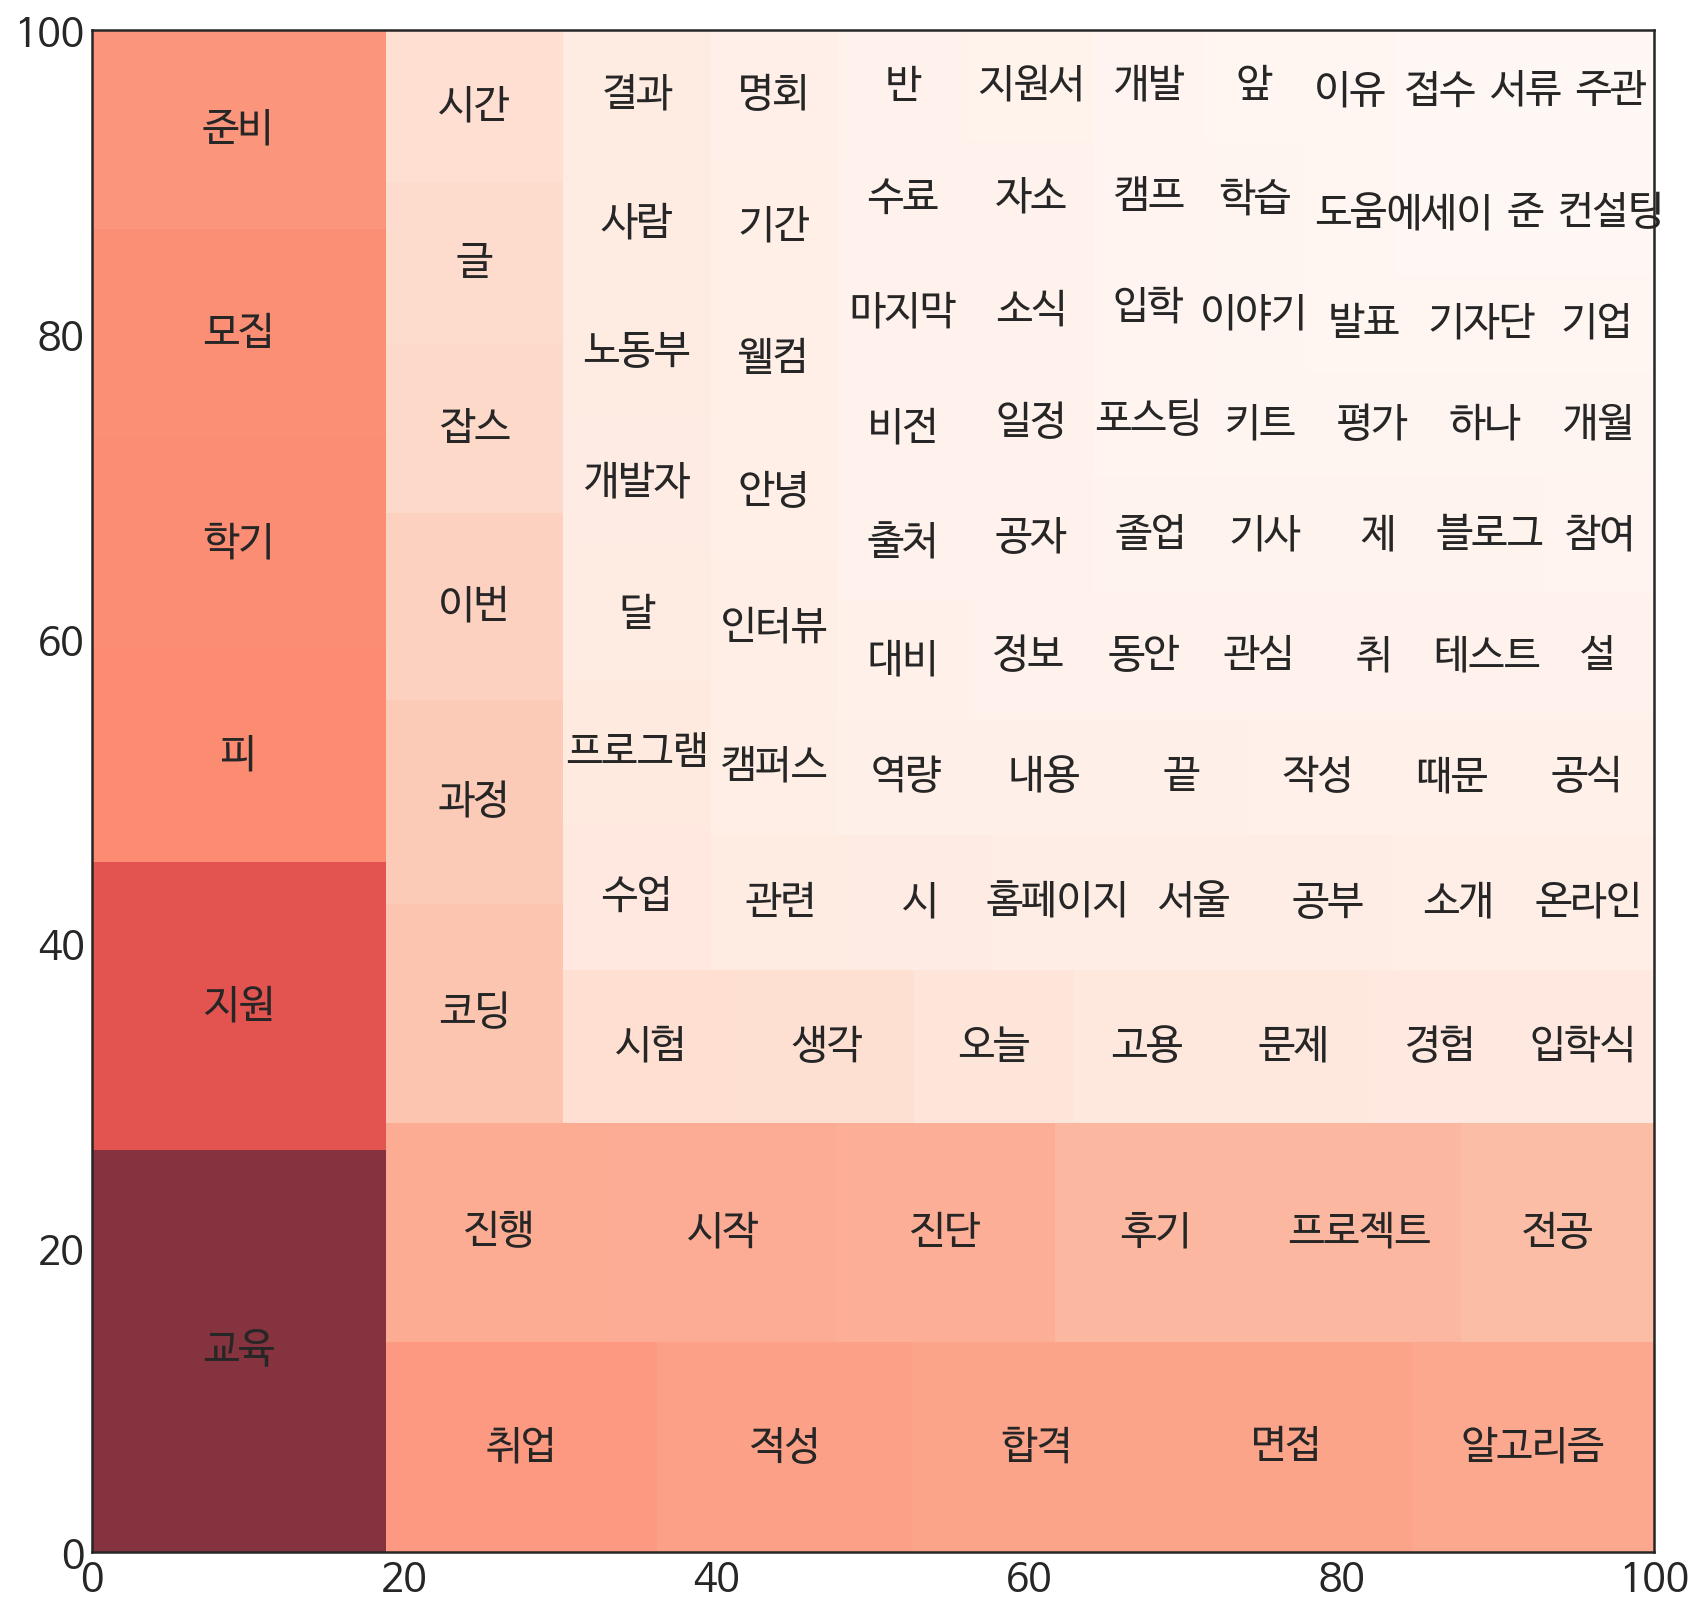

In [ ]:
plt.rcParams['figure.figsize'] = (14,14)
plt.rcParams['font.size'] = 20

norm = mpl.colors.Normalize(vmin=min(top_blog_nouns.values()), vmax=max(top_blog_nouns.values()) )

colors = [mpl.cm.Reds(norm(value)) for value in top_blog_nouns.values()]

squarify.plot(label=top_blog_nouns.keys(),
              sizes=top_blog_nouns.values(),
              color=colors,
              alpha=.8)

### 워드클라우드 시각화

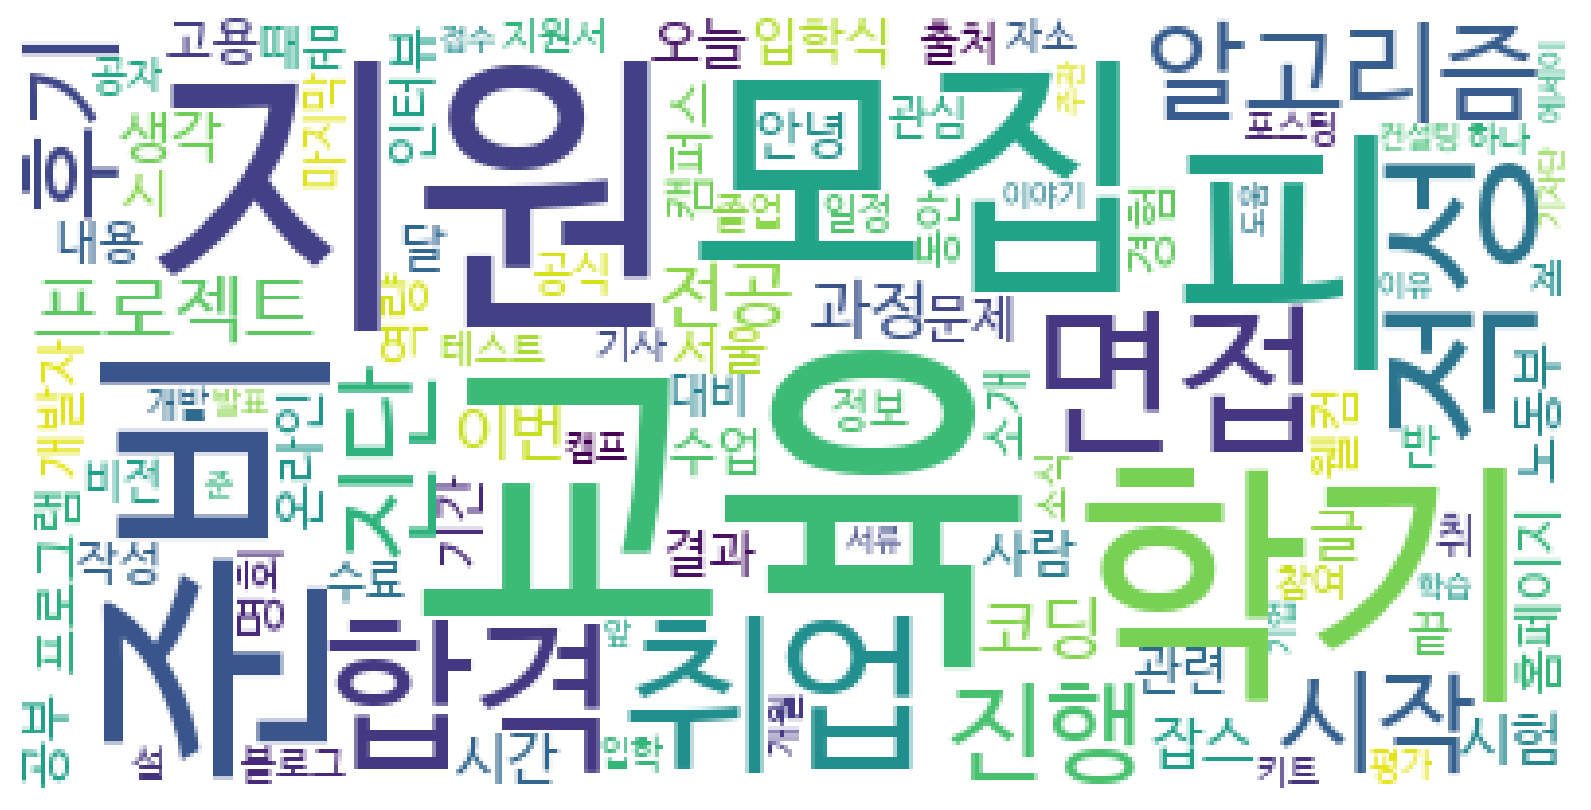

In [ ]:
from wordcloud import WordCloud

wc = WordCloud(background_color='white', font_path='./font/NanumBarunGothic.ttf')
wc.generate_from_frequencies(top_blog_nouns)

figure = plt.figure(figsize=(14,14))
ax = figure.add_subplot(1,1,1)
ax.axis('off')
ax.imshow(wc)
plt.show()
